<a href="https://colab.research.google.com/github/AruntejaLonka/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction(final_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Team Members:** 1) ArunTeja Lonka  2) Upasana Kumari  3) Zunaid  4) Sukesh shetty

 **Problem Statement:**
 The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

# **Data Description**
### **Demographic:**


* Sex: male or female("M" or "F")
* **Age:** Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) Behavioral
* **Is_smoking:** whether or not the patient is a current smoker ("YES" or "NO")
* **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) Medical( history)
* **BP Meds:** whether or not the patient was on blood pressure medication (Nominal)
* **Prevalent Stroke:** whether or not the patient had previously had a stroke (Nominal)
* **Prevalent Hyp:** whether or not the patient was hypertensive (Nominal)
* **Diabetes:** whether or not the patient had diabetes (Nominal) Medical(current)
* **Tot Chol:** total cholesterol level (Continuous)
* **Sys BP:** systolic blood pressure (Continuous)
* **Dia BP:**diastolic blood pressure (Continuous)
* **BMI**: Body Mass Index (Continuous)
* **Heart Rate**:   heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
### **Predict variable (desired target)**
* **Glucose:** glucose level (Continuous) Predict variable (desired target)
10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV

### **Importing Libraries**

In [160]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [161]:
#copy the data set path
path  = "/content/drive/MyDrive/Data sets/data_cardiovascular_risk.csv"

# **Loading Dataset and Analysing**

In [162]:
df = pd.read_csv(path)

In [163]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [164]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


We can observe that the dataset contains many categorical(ordinal and nominal) and numerical (continous and discrete) variables.

In [165]:
#Identify different charachteristics of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

From the above info function we get to know , we have 16 coloumns and 3390 rows in our dataset .


In [166]:
for i in df.columns:
  print(i,df[i].nunique())

id 3390
age 39
education 4
sex 2
is_smoking 2
cigsPerDay 32
BPMeds 2
prevalentStroke 2
prevalentHyp 2
diabetes 2
totChol 240
sysBP 226
diaBP 142
BMI 1259
heartRate 68
glucose 132
TenYearCHD 2


Now, we can see that how many categories and how many unique values are present in categorical variables and numerical variables. So for further study, we are defining two lists as categorical and numerical variables.

In [167]:
#defining numeric and categorical column to treat null values based on that
categorical_columns = ['education','cigsPerDay','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']
numerical_columns = ['age','totChol','sysBP','diaBP','BMI','heartRate','glucose']
#Here age,CigsPerDay,totChol,sysBP,diaBP,heartrate and glucose are discrete numerical variables

In [168]:
#defining categorical variables as categorical
for i in categorical_columns:
  df[i].astype("category")

In [169]:
#checking the categories in each categorical column
for i in categorical_columns:
  if i!='cigsPerDay':
    print(i,df[i].value_counts().reset_index(),"\n")

education    index  education
0    1.0       1391
1    2.0        990
2    3.0        549
3    4.0        373 

sex   index   sex
0     F  1923
1     M  1467 

is_smoking   index  is_smoking
0    NO        1703
1   YES        1687 

BPMeds    index  BPMeds
0    0.0    3246
1    1.0     100 

prevalentStroke    index  prevalentStroke
0      0             3368
1      1               22 

prevalentHyp    index  prevalentHyp
0      0          2321
1      1          1069 

diabetes    index  diabetes
0      0      3303
1      1        87 

TenYearCHD    index  TenYearCHD
0      0        2879
1      1         511 



Here TenYearCHD is the dependent variable and we can observe that only 16% (511/3390) of the total dataset is in '1' class, remaining 2879/3390 are in '0' class. We may face some difficulty in building model regarding this.

In [170]:
#Check the Statistical discription of numerical value in dataset
#Crunch the numbers   
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3390.0,1694.500000,978.753033,0.00,847.25,1694.50,2541.75,3389.0
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
BPMeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0


Under Statistical discription of numerical value in dataset ,we get Know there are some outliers in data..

## **Missing/NULL Values**

Looking for the lost souls
Why look for the null values? - these unrecorded information might play a prominent role in our analysis by providing us with important answers to hidden questions, might even lead us towards false predicitons and sometimes may not even affect at all. So it's always a better practice to catch the lost souls before moving on.

Few doubts that pop up in our analytical minds are...

How ubiquitous are the missing values?
Are they random?
Do they show a pattern?

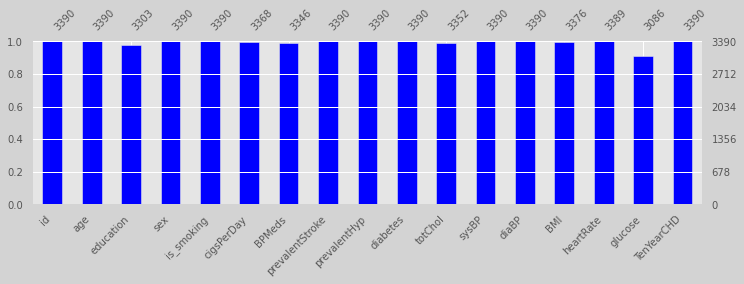

In [171]:
#Visualize the missing values
import missingno as msno
plt.figure(facecolor='lightgray')
msno.bar(df,color='blue',figsize=[12,3],fontsize=10)
plt.show()

## Moving on with the next steps, let's take a sneak peek at the count and percentages of the null values before we proceed further...

In [172]:
#Dig into the count and percentages
tot_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = (df.isnull().sum()* 100 / len(df)).round(2).sort_values(ascending=False)
lost_souls = pd.concat([tot_missing, percent_missing], axis=1, keys=['Total', 'Percentage'])
lost_souls.head(20)

,Total,Percentage
glucose,304,8.97
education,87,2.57
BPMeds,44,1.30
totChol,38,1.12
cigsPerDay,22,0.65
BMI,14,0.41
heartRate,1,0.03
id,0,0.00
diaBP,0,0.00
sysBP,0,0.00


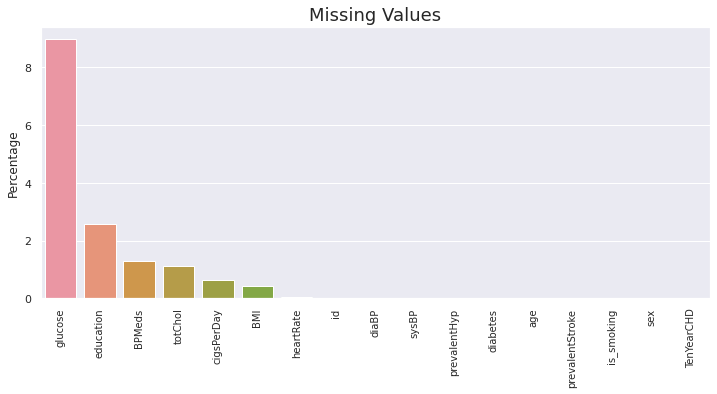

In [173]:
#Visualize the numbers
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(12,5)})

vis_missing = sns.barplot(x=lost_souls.index, y='Percentage', data=lost_souls)

vis_missing.set_title('Missing Values', fontsize = 18)
vis_missing.set_xticklabels(vis_missing.get_xmajorticklabels(), fontsize =10, rotation=90)
plt.show()

Mmmmm...magnificent! This reveals columns "glucose" , "education","BPMeds" , 'totChol', "cigsPerDay", and "BMI".
only need a quick replacement with some statstical mean, mode and the ever loving number '0' used when filling up the null values in data analysis. But before that let's get rid of the unwanted!

# **2. Univariate Analysis**
( a ) Analysing the data thriugh pie chart

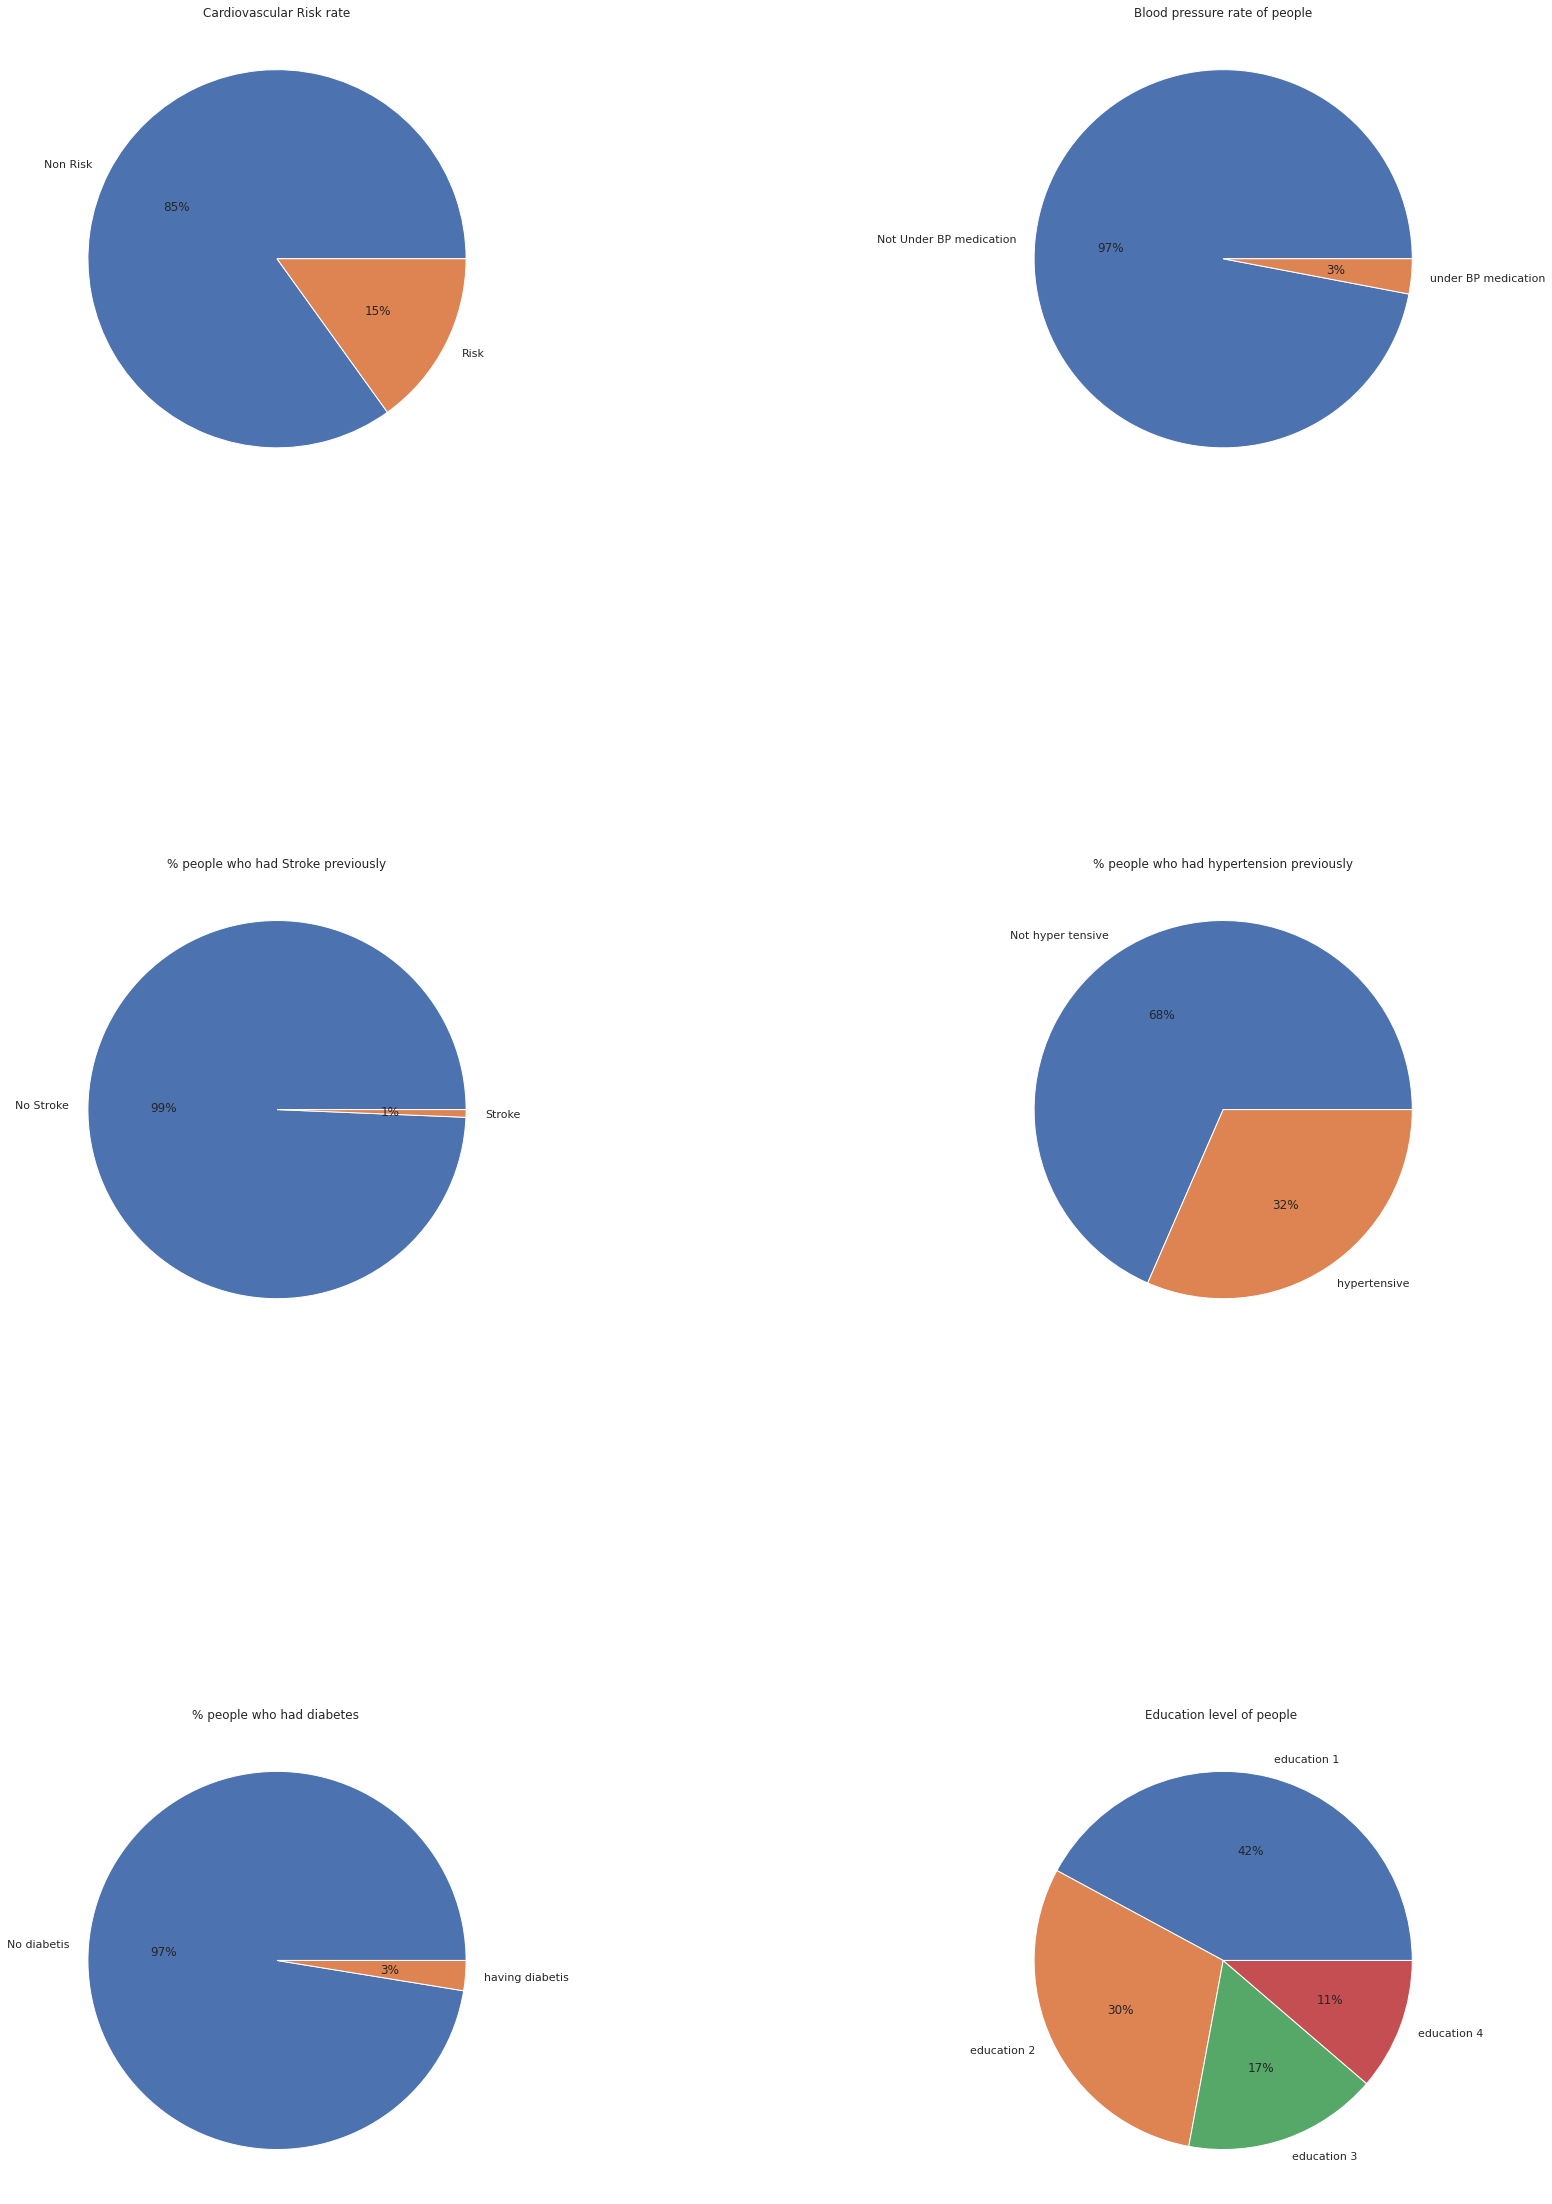

In [174]:
fig, ax = plt.subplots(figsize = (30, 40))

plt.subplot(3,2,1)
labels = 'Non Risk',"Risk"
plt.pie(df['TenYearCHD'].value_counts(), labels=labels ,autopct='%1.0f%%')
plt.title("Cardiovascular Risk rate")

plt.subplot(3,2,2)
labels = 'Not Under BP medication',"under BP medication"
plt.pie(df['BPMeds'].value_counts(), labels=labels ,autopct='%1.0f%%')
plt.title("Blood pressure rate of people")

plt.subplot(3,2,3)
labels = 'No Stroke','Stroke'
plt.pie(df['prevalentStroke'].value_counts(), labels=labels ,autopct='%1.0f%%')
plt.title("% people who had Stroke previously")

plt.subplot(3,2,4)
labels = 'Not hyper tensive','hypertensive'
plt.pie(df['prevalentHyp'].value_counts(), labels=labels ,autopct='%1.0f%%')
plt.title("% people who had hypertension previously")

plt.subplot(3,2,5)
labels = 'No diabetis','having diabetis'
plt.pie(df['diabetes'].value_counts(), labels=labels ,autopct='%1.0f%%')
plt.title("% people who had diabetes ")

plt.subplot(3,2,6)
labels = 'education 1','education 2','education 3','education 4'
plt.pie(df['education'].value_counts(), labels=labels ,autopct='%1.0f%%')
plt.title("Education level of people ")

plt.subplots_adjust(hspace= 0.8, wspace= 0.3)
plt.show()

Now, we can conclude that,

(1) There are 85% of people are actually not at risk of Cardio Vascular Risk.

(2) There are only 3% of people who are under BP medication.

(3) There are only 1% of people who had stroke previously.

(4) There are 32% of people who are having Hyper Tension.

(5) There are 97% of the people who are non diabetic.

(6) There are 11%(least) of the people are having highest level education and 42%(highest) of the people are having basic education level.

### **( b ) Histogram plot for all columns**

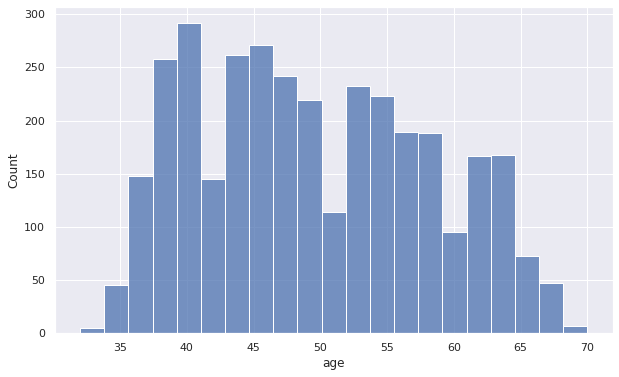

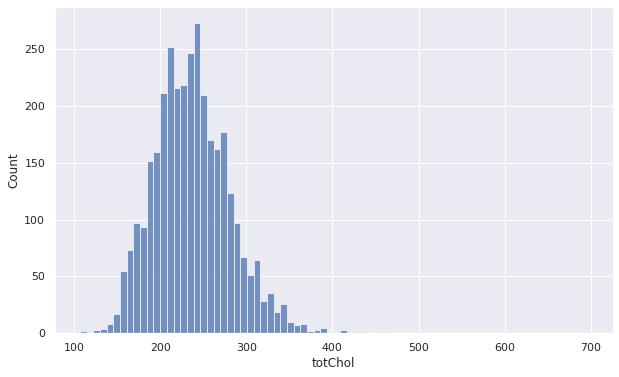

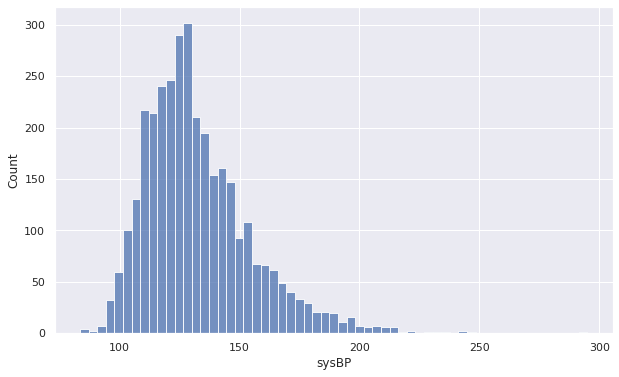

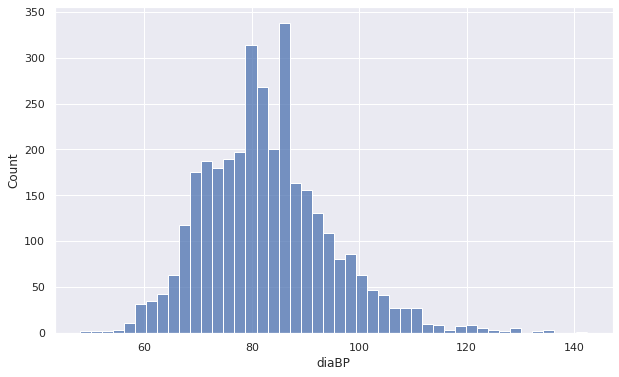

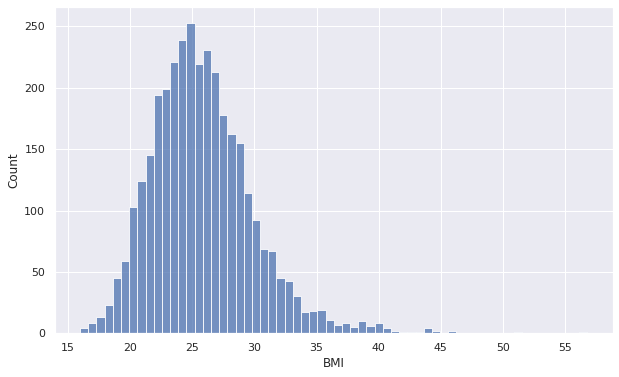

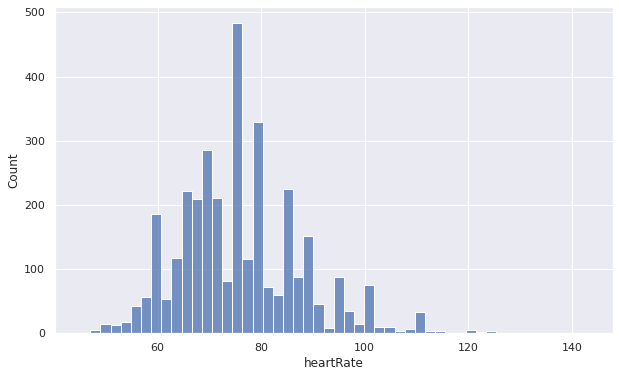

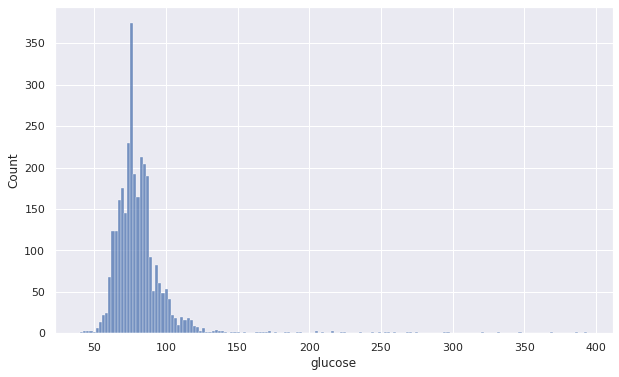

In [175]:
sns.set(rc = {'figure.figsize':(15,8)})
for i in numerical_columns:
  if i != 'id':
    plt.figure(figsize=(10,6))
    sns.histplot(df[i])

# **3. Bivariate Analysis**
### **( a ) Numerical columns with the dependent variable**
### **( i ) Violin plot for all numerical varibles along with dependent variables**  


In [176]:
numerical_columns

['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

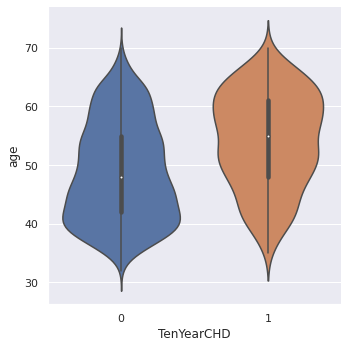

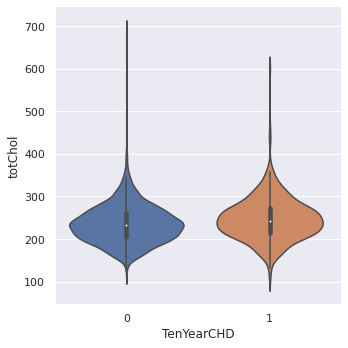

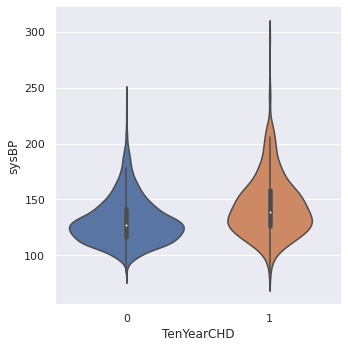

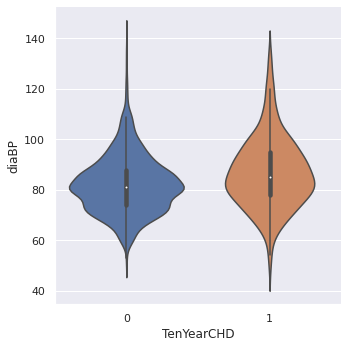

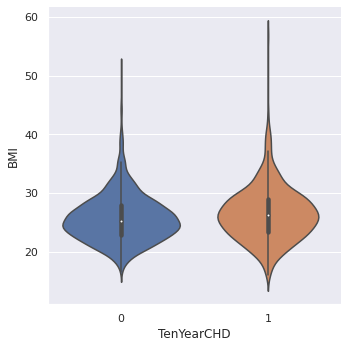

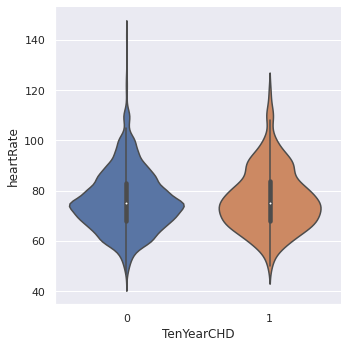

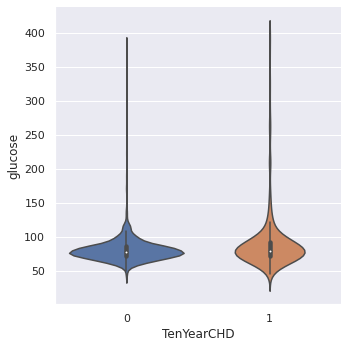

In [177]:
for i in numerical_columns:
  sns.catplot(x="TenYearCHD", y=i, kind='violin',data=df)

**( ii ) Bar plot for al the numerical variables along with dependent variable**

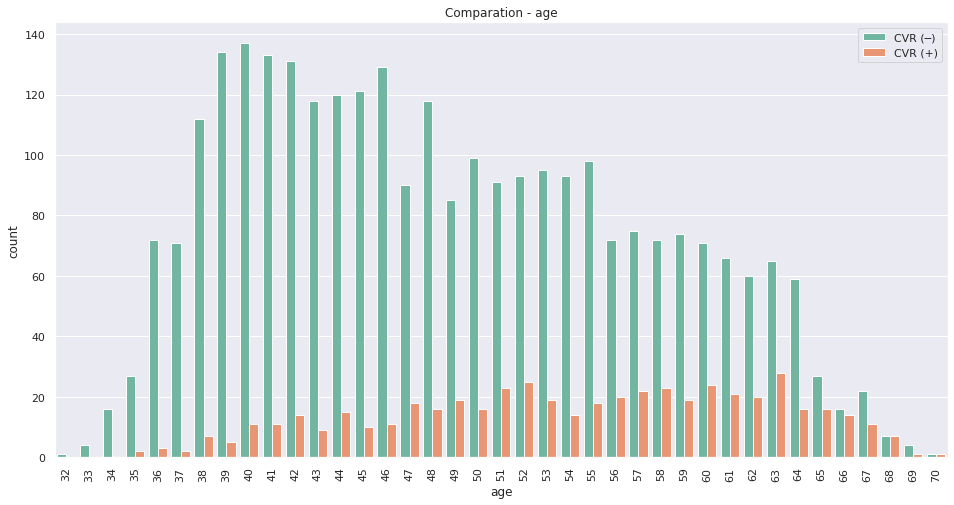

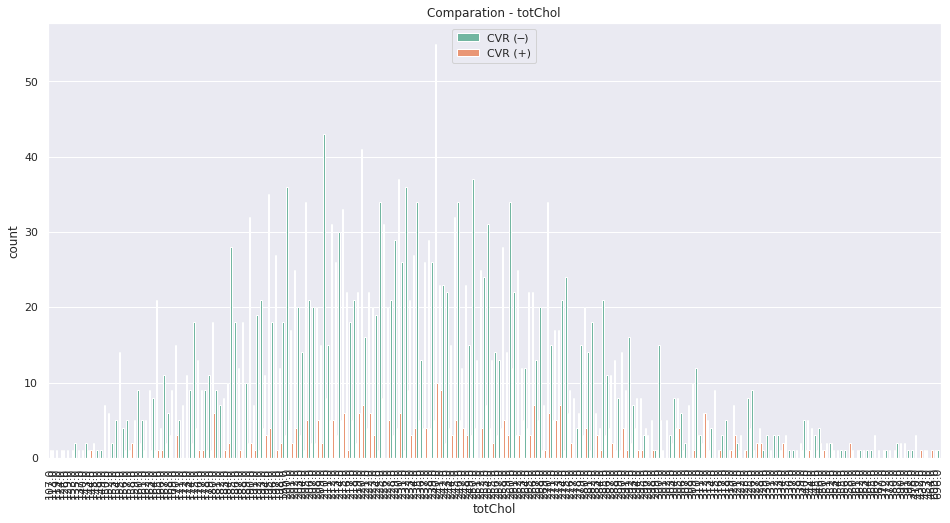

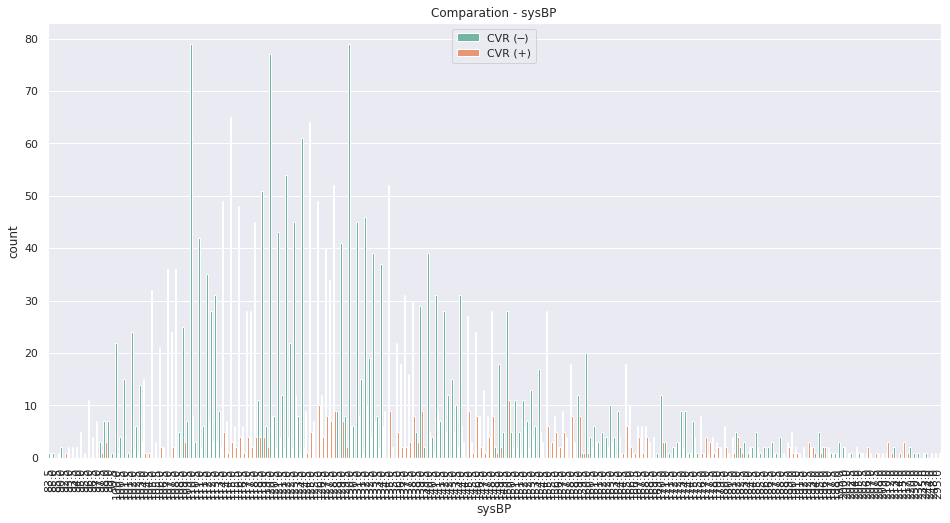

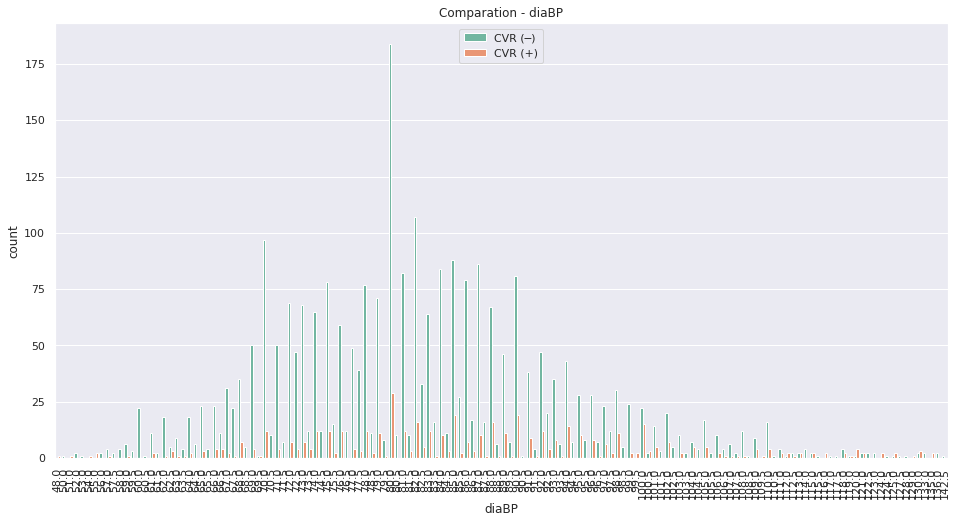

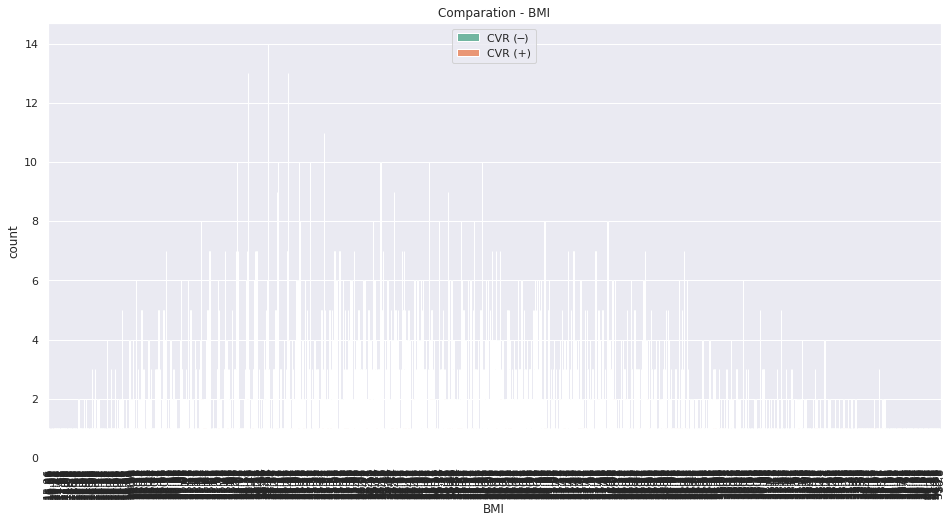

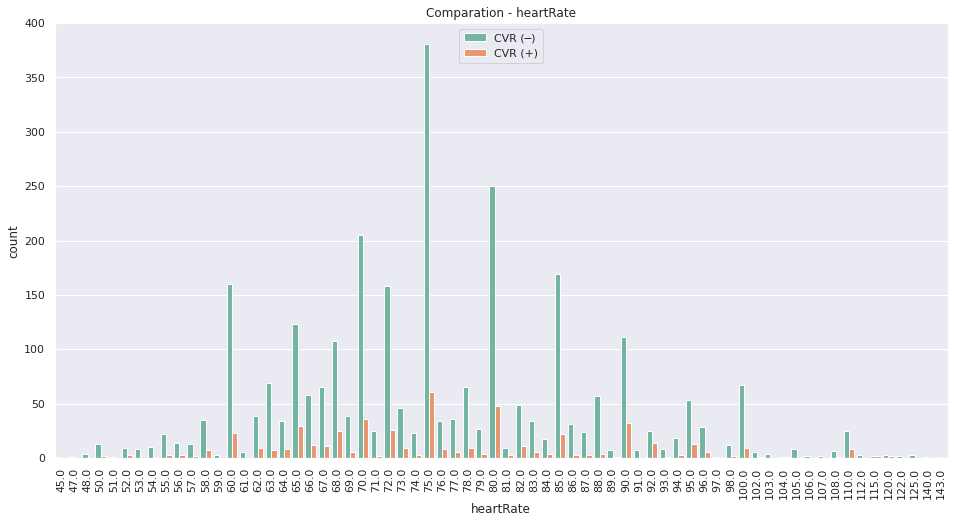

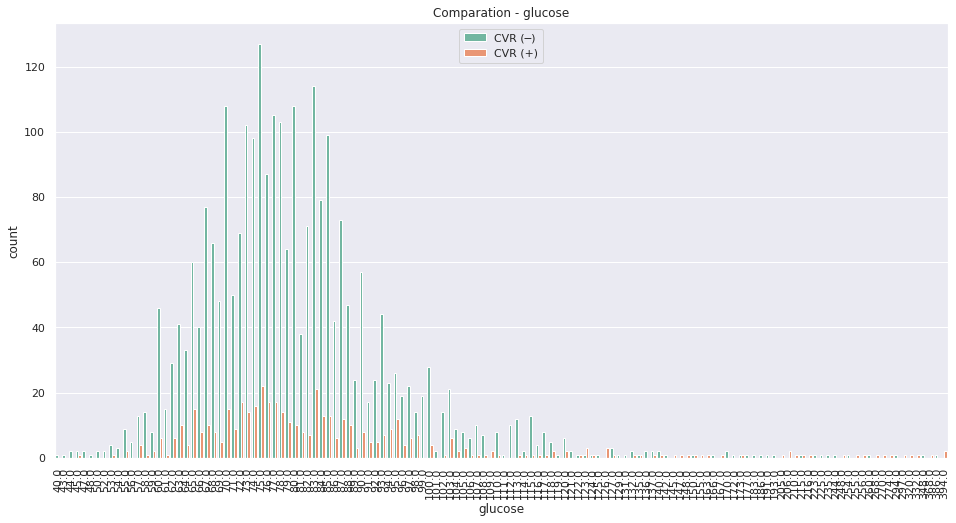

In [178]:
from matplotlib import rcParams

def NumPlot(df, col):
    # rcParams['figure.figsize'] = 11, 8
    plt.figure(figsize=(16,8))
    plt.xticks(rotation=90)
    sns.countplot(x=col, hue='TenYearCHD', data = df, palette="Set2")
    plt.title('Comparation - {}'.format(col))
    plt.legend(['CVR (─)', 'CVR (+)'])

for i in numerical_columns:
  NumPlot(df,i)

Here, we tried plotting all numerical varables with the dependent variables. From here we can conclude that,

(1) The major people who are having Cardio Vasclar Risk(CVR) are at the age of 50-70.

(2) The cholestrol level of people is same for both kind of people who are at risk of CVR and not at risk of CVR. Instead fewer people who are not at risk of CVR are having high Cholestrol level.

(3) If we consider sysBP and diaBP together into consideration, then most of the people are having normal BP. So its hard to conclude to here about the CVR.

(4) Even though many people are having normal range of BMI, but the people whoevever are having high BMI, they are at risk of CVR.

(5) Many people are having normal heartrate range, so its not appropriate to come into conclusion about the CVR at this stage.

(6) In glucose level, we can see some outliers in both kind of people(whoa are at risk and not at risk). But the people who got high glucose level are coming into the category of CVR. So we can conclude that its even one of the factor which may contribute to CVR.

**( b ) Categorical variable with the dependent variable**

In [179]:
categorical_columns

['education',
 'cigsPerDay',
 'sex',
 'is_smoking',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

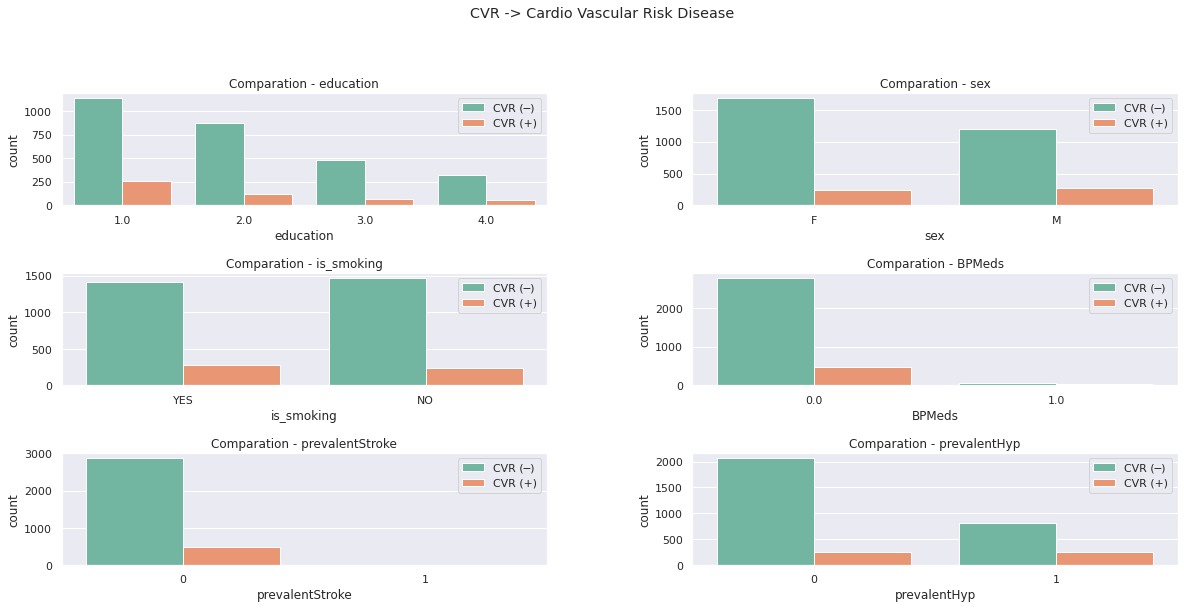

In [180]:
def habitPlot(df, col):
    sns.countplot(x= col,
                  hue= 'TenYearCHD',
                  data= df, palette="Set2")
    plt.title('Comparation - {}'.format(col))
    plt.legend(['CVR (─)', 'CVR (+)'])

fig, ax = plt.subplots(figsize = (20, 12))
fig.suptitle('CVR -> Cardio Vascular Risk Disease')

plt.subplot(4,2,1)
habitPlot(df, 'education')

plt.subplot(4,2,2)
habitPlot(df, 'sex')

plt.subplot(4,2,3)
habitPlot(df, 'is_smoking')

plt.subplot(4,2,4)
habitPlot(df, 'BPMeds')

plt.subplot(4,2,5)
habitPlot(df, 'prevalentStroke')

plt.subplot(4,2,6)
habitPlot(df, 'prevalentHyp')

plt.subplots_adjust(hspace= 0.6, wspace= 0.3)
plt.show()

Here, we are plotting the graph for the dependent variable along with the categorical variables present in the dataset.

We can conclude from here that,

(1) The people whoever already under the HyperTension, are at more risk of CVR

(2) But its not the same in case of people who were under the attack of stroke once before. The people who never got the stroke are at high risk of CVR.

(3) Whether people smoke or not smoke, they are at risk of CVR.

(4) Its shocking to see that the people who never got any medication barely comes under the risk of CVR. The people who are under BP medications are at high risk of CVR.

(5) When we compare males and females, males are at more risk of CVR.

(6) We can clearly see that, the people who had only basic education i.e., education 1 are at more risk of CVR. And its gradually decreasing with increase in education. It might be because that the people wo are educated are taking much precaustions to avoid CVR.

### **4. Multivariate Analysis**


In [181]:
numerical_columns

['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

Here we are trying to get some conclusions about some numerical columns. So we tried plotting the same along with CVR and few more important variables whichever is useful to to come to conclusion.

**( a ) Age and CVR with other numerical columns**

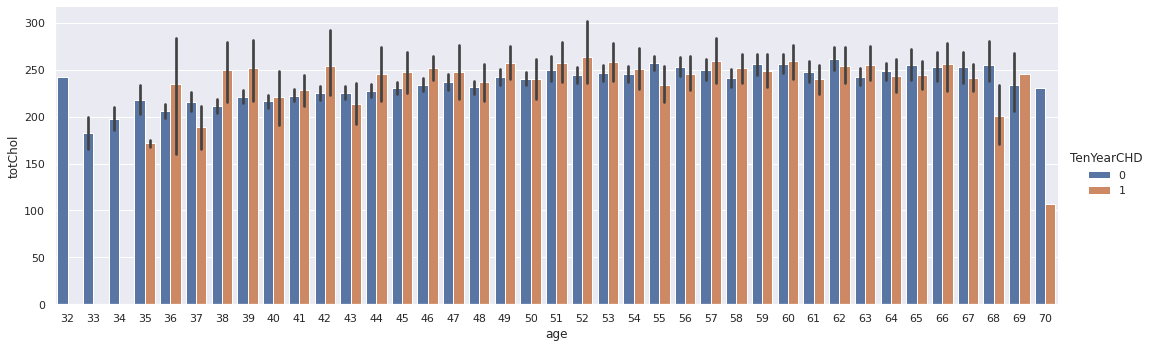

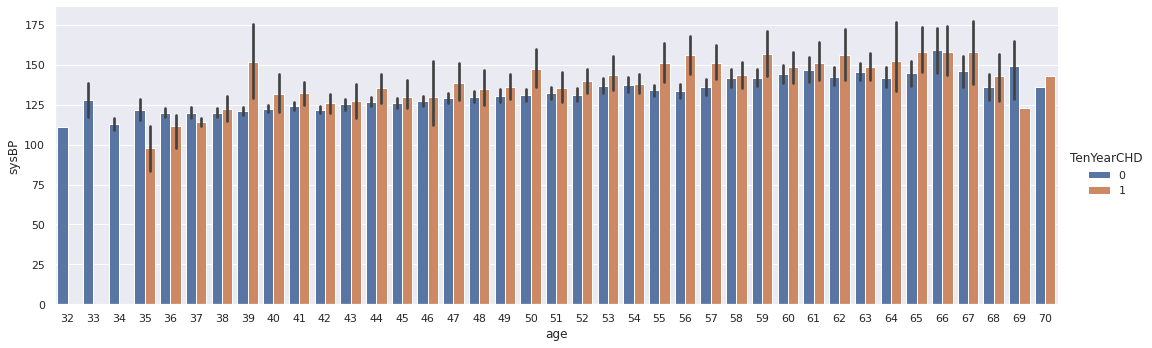

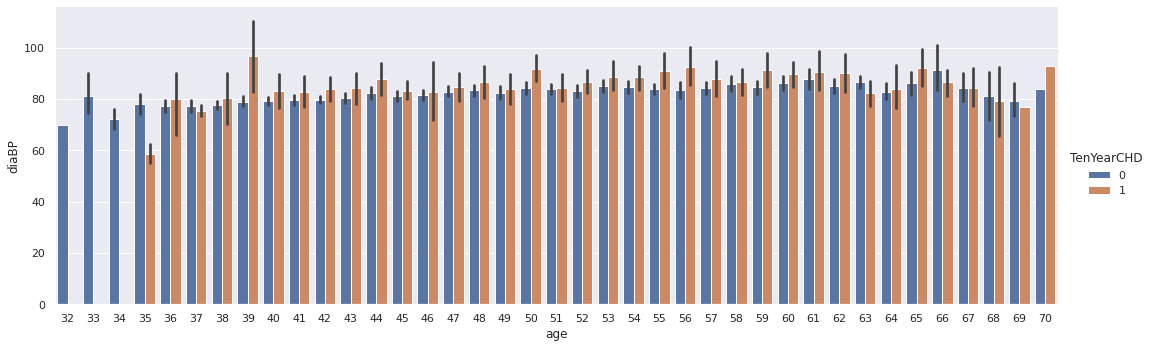

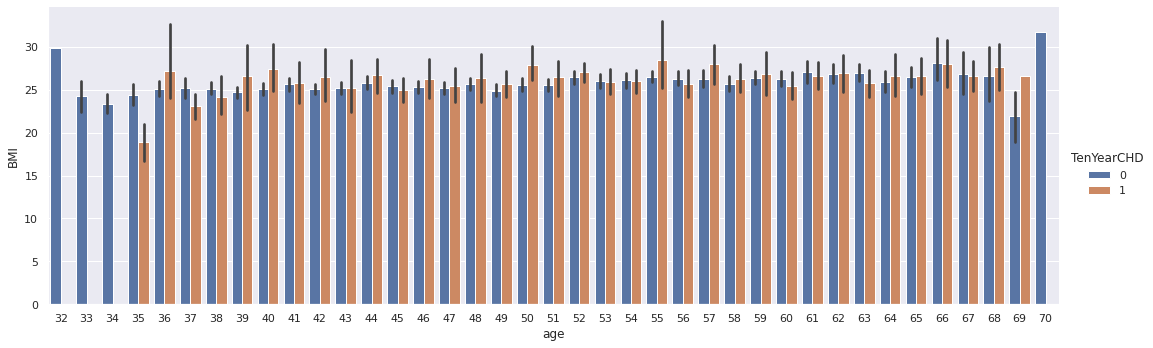

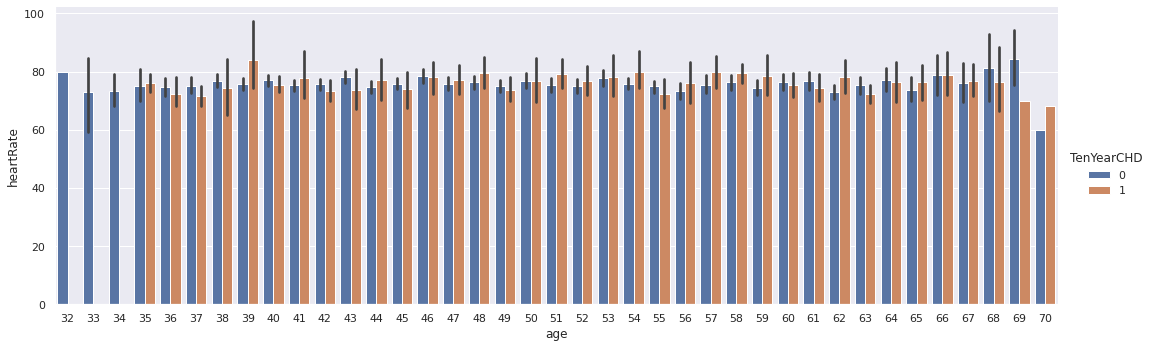

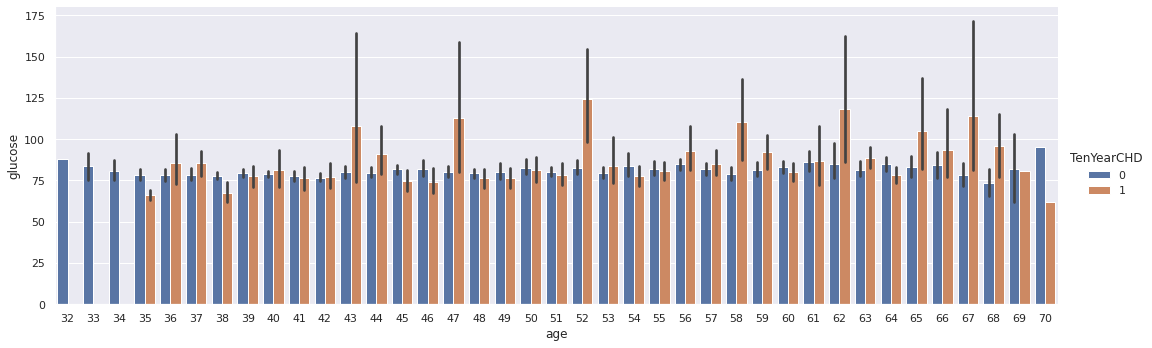

In [182]:
for i in numerical_columns:
  if i!='age':
    sns.catplot(x="age", y=i, hue="TenYearCHD", kind="bar", data=df,height=5, aspect=3)

Here we can observe that,

(1) The people who were under the risk of CVR were from the age>34. And age did not matter to any of other numerical variables. We can see same level of measures such as BP, BMI etc., for all age group.

(2) The cholestrol level for these peple is slighly more when we compare it with the people who are not at risk of CVR. And at the age of 70, even though they were having slighly low level of cholestrol, they were at risk of CVR.

(3) If we consider sysBP, diaBP, heart rate and BMI together for the overall conclusion, we can conclude that all the people who are at risk are having high values of these measures than the people who are not at risk of CVR.

### **( b ) Education and CVR with other numerical columns**

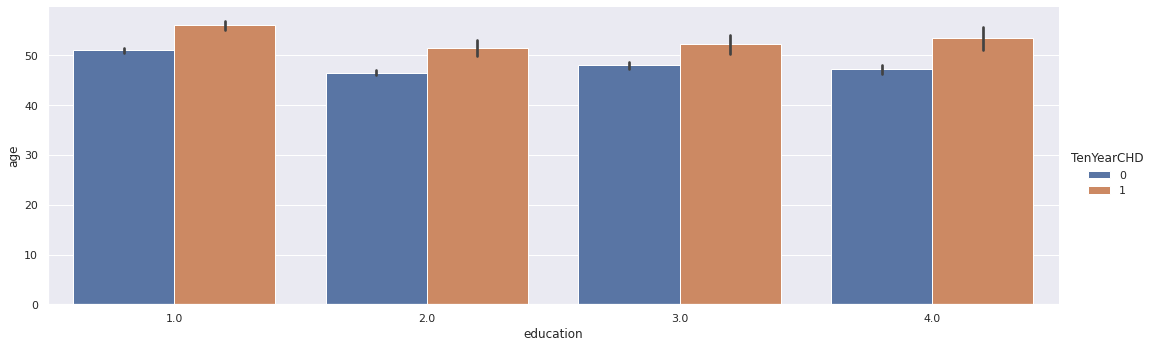

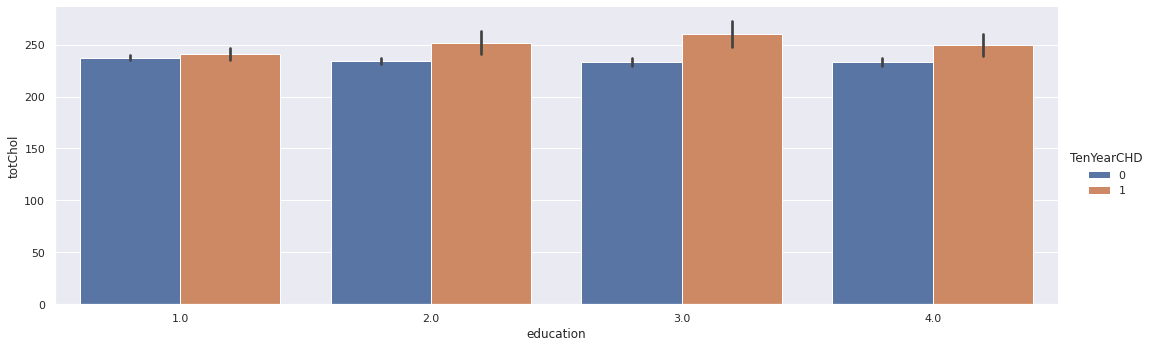

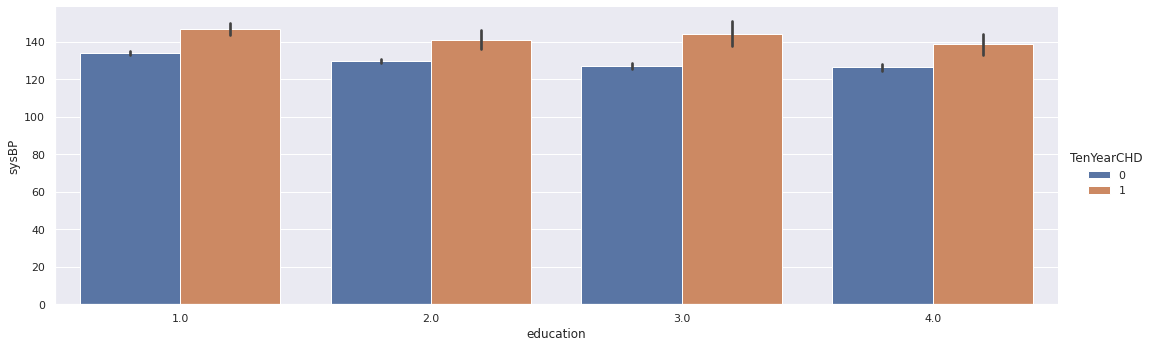

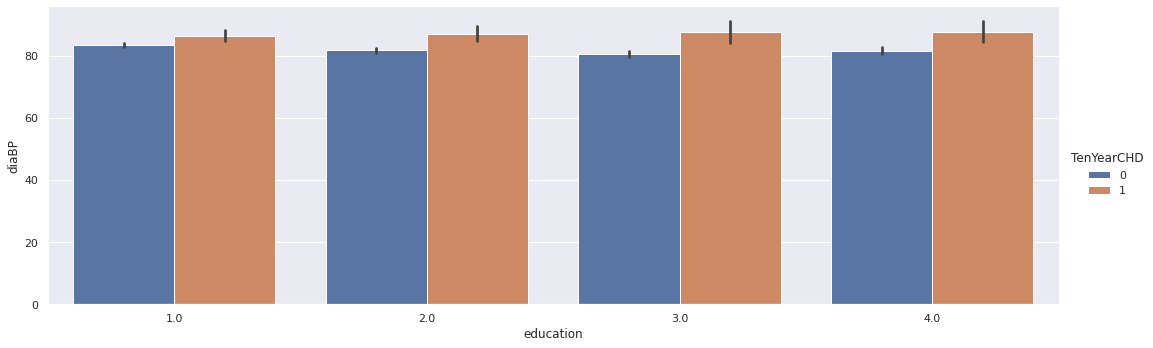

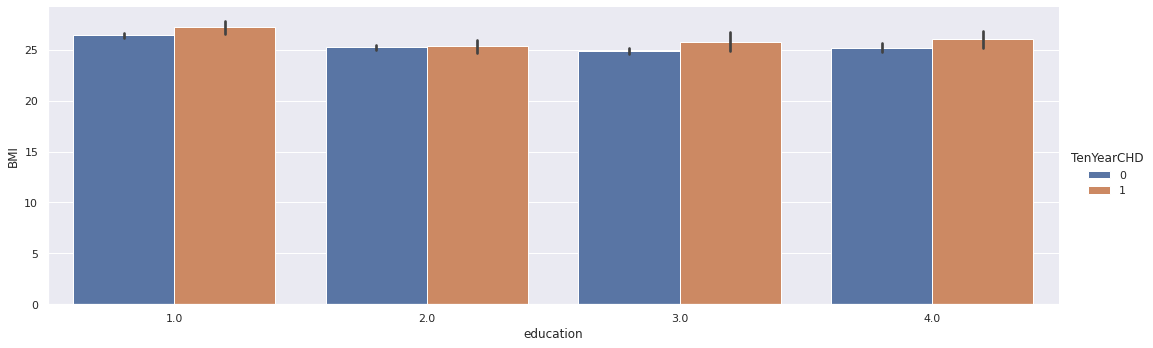

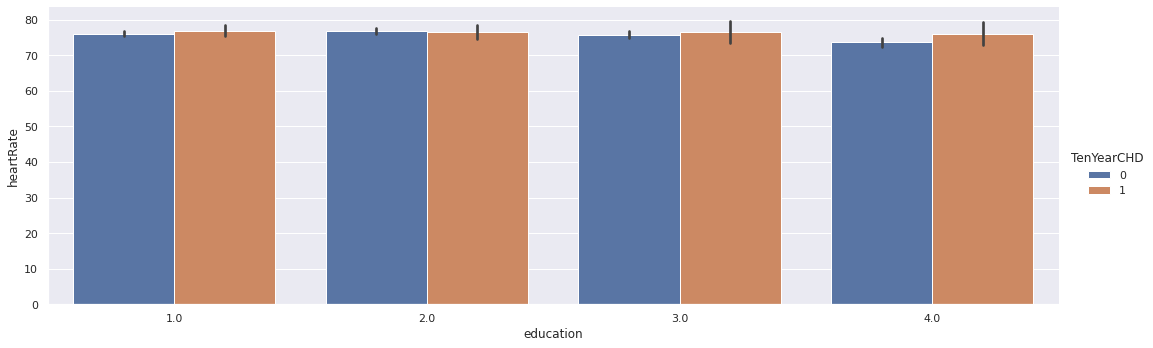

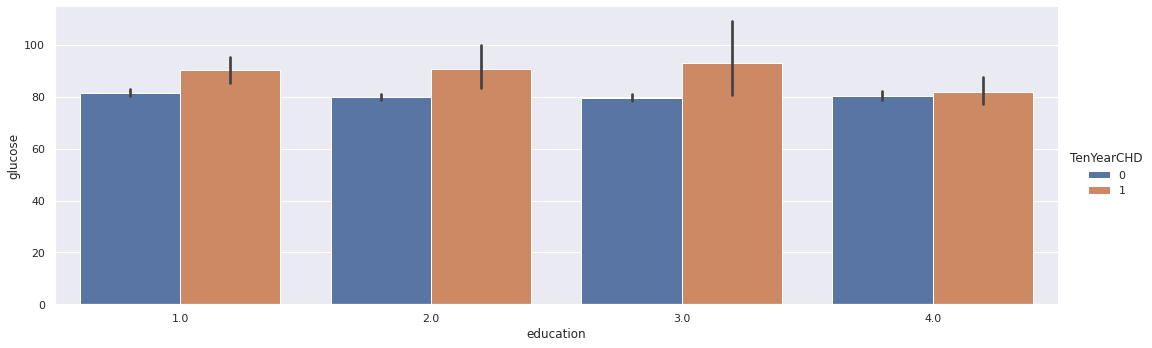

In [183]:
for i in numerical_columns:
  sns.catplot(x="education", y=i, hue="TenYearCHD", kind="bar", data=df,height=5, aspect=3)

From this we can conclude that,

(1) The people who had the basic level education are at more risk of CVR when we compare the levels of education.

(2) Cholestrol level is high for fewer people in education level 2. But people who had basic education were at more risk of CVR.

(3) People with only the basic education are having more BP(considering sysBP,diaBP together), heartrate and BMI as well. So they are directly at more risk of CVR.

(4) People with the highest education (Education 4) are having controlled balanced glucose level. But other fewer people with other education levels are having very high cholestrol. We cna see a peak in glucose level in education leval 3 group people.

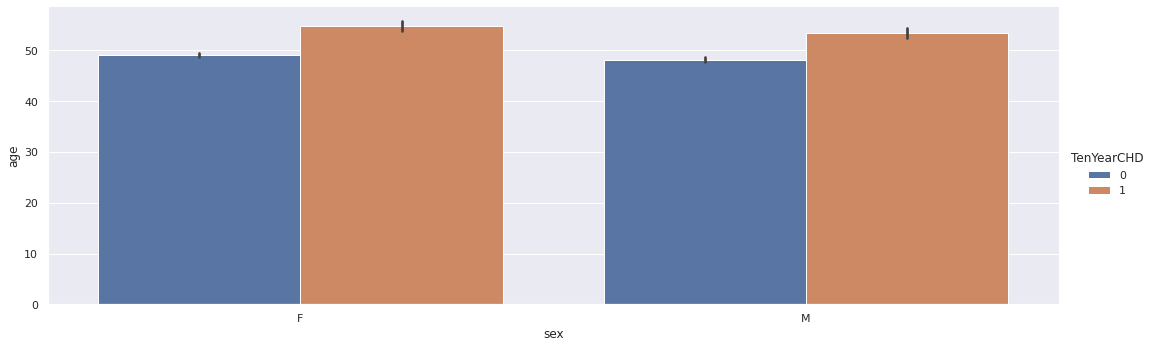

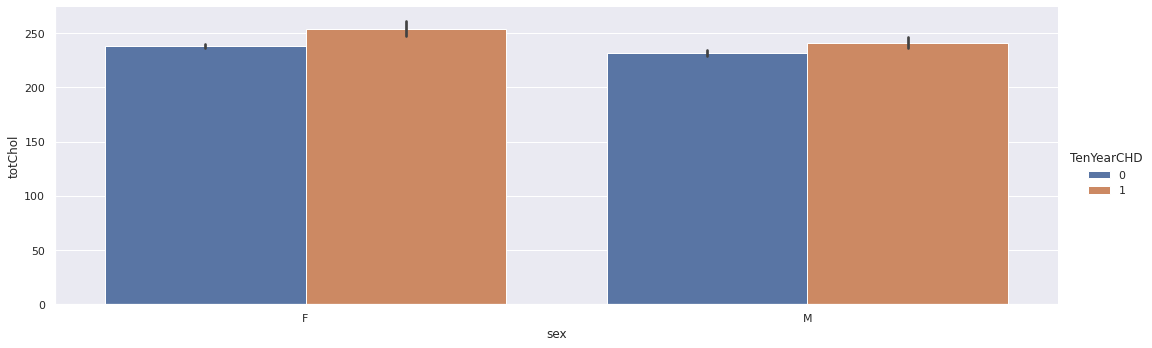

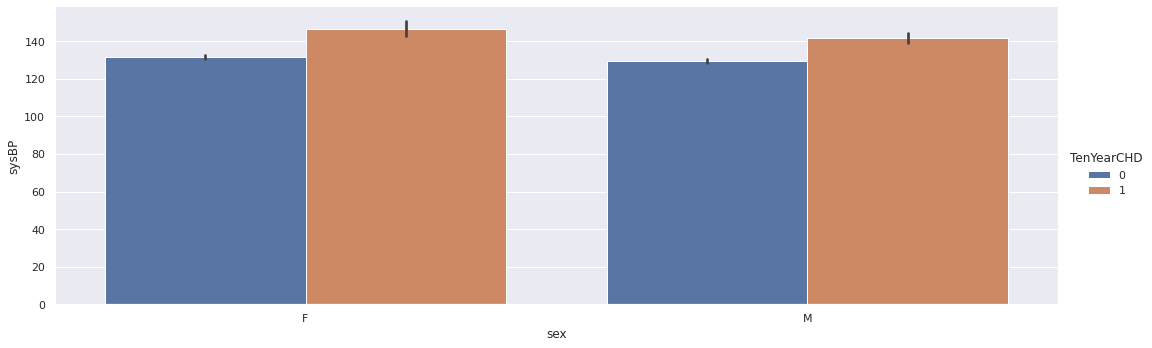

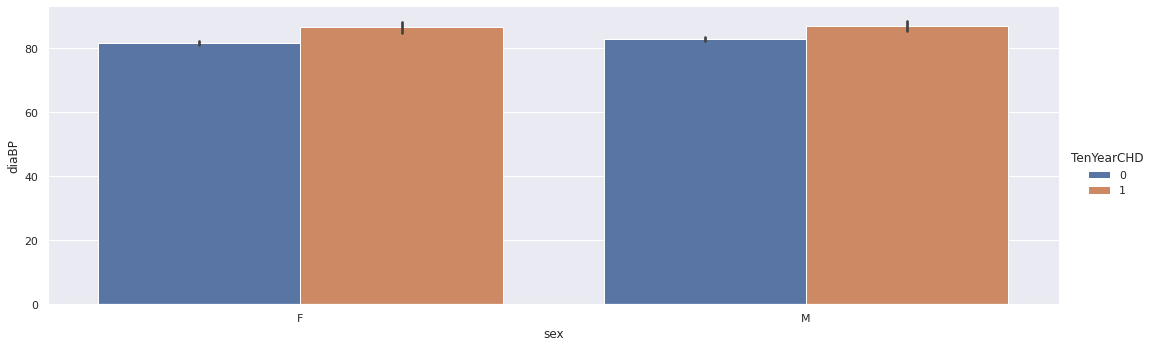

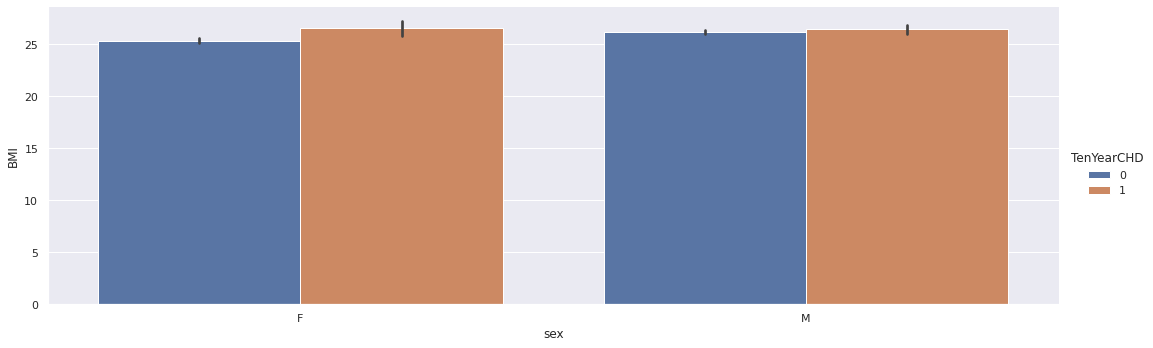

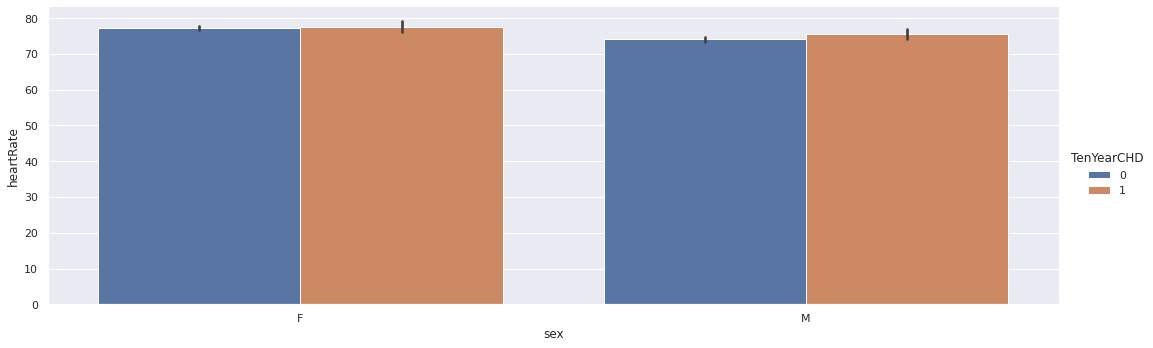

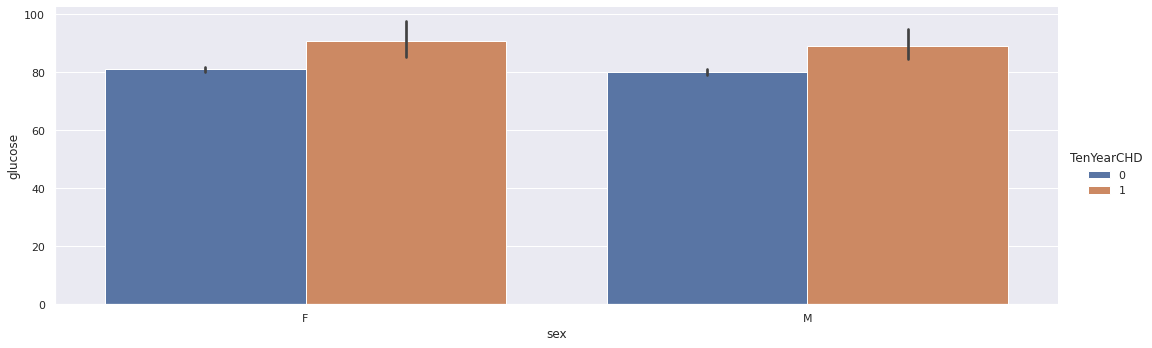

In [184]:
for i in numerical_columns:
  sns.catplot(x="sex", y=i, hue="TenYearCHD", kind="bar", data=df,height=5, aspect=3)

From here we can conclude that,

(1) Females are having high BP, high heart rate, high BMI and even high values of glucose. But the females who are between the age group of 50-70 are at more risk of CVR.

(2) Males between the age group 40-70 are at more risk of CVR.

(3)Whoever had the highest glucose level amongst men all comes under the risk of CVR.

(4) We can see that some of the highest cholestrol values are obtained by men (alone). This might be the reason that they are at high risk of CVR.

(5) But many men maintained normal range of BP, heartrate and BMI.

### **( d ) Diabetes and CVR with other numerical columns**

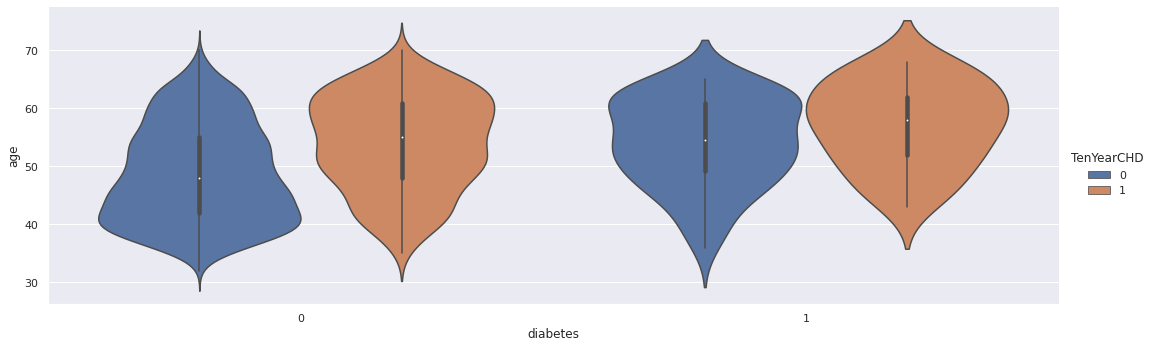

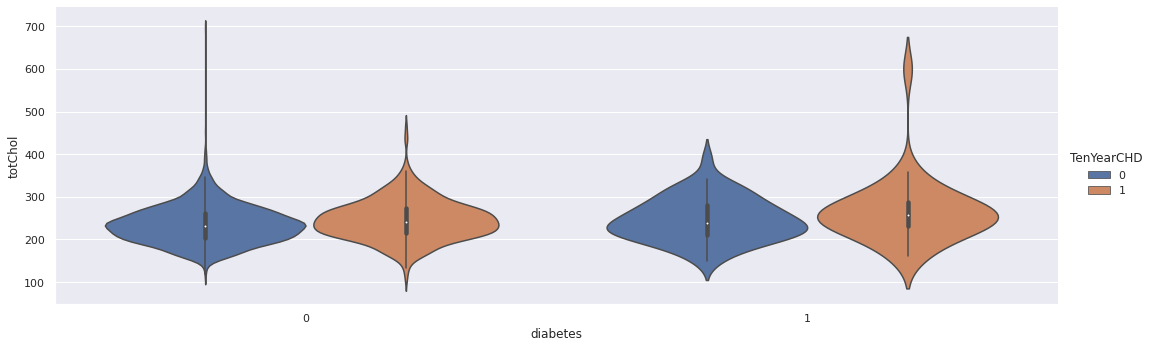

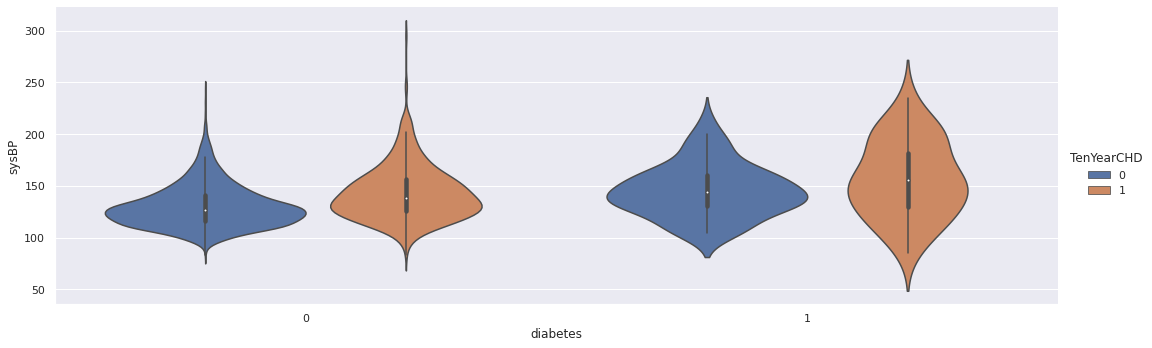

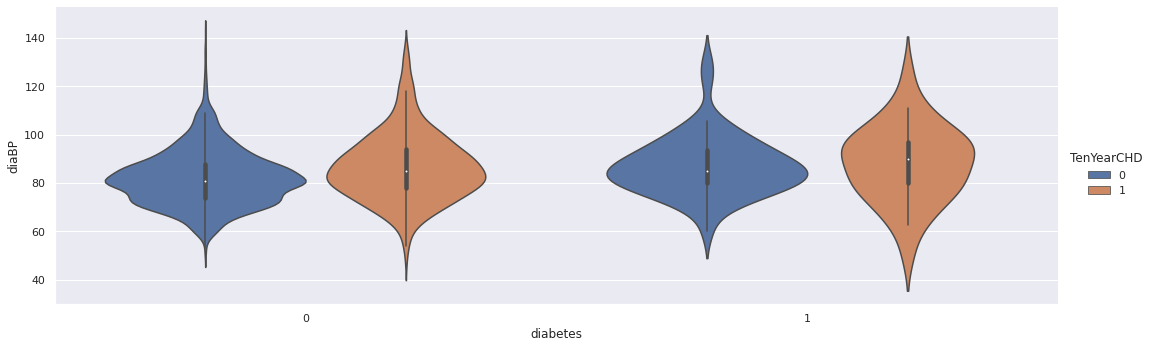

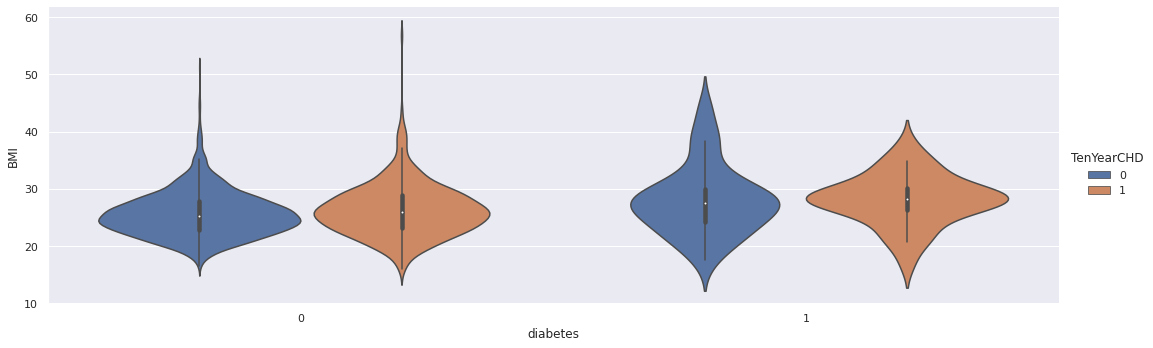

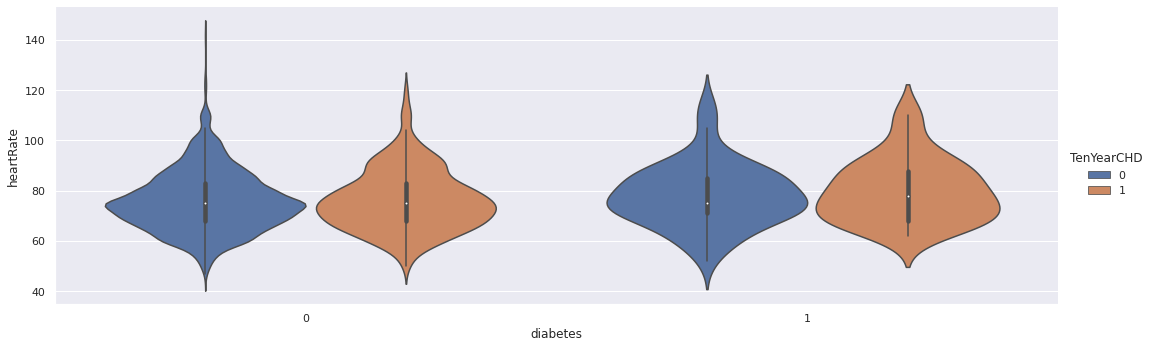

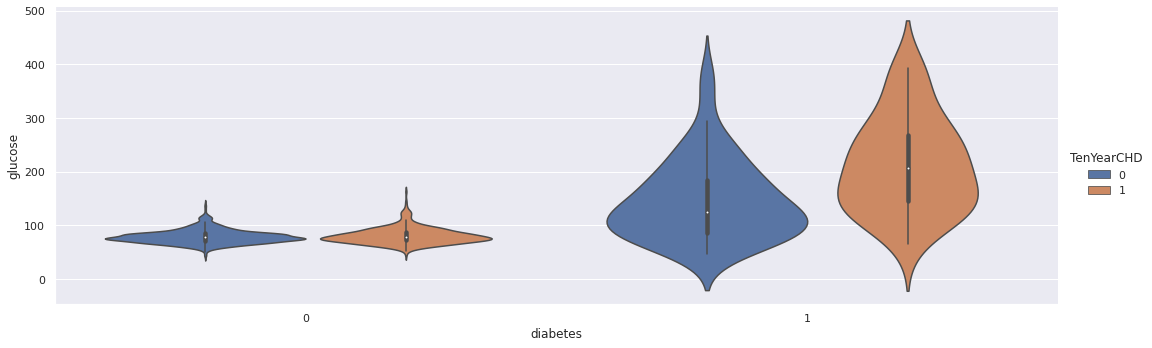

In [185]:
for i in numerical_columns:
  sns.catplot(x="diabetes", y=i, hue="TenYearCHD", kind="violin", data=df,height=5, aspect=3)

Here, we can observe that,

(1) Even though they had diabetes or not, they are at same level of risk of CVR. But its high between the age group 50-70.

(2) We say that cholestrol and diabetes are related, but from the data, its contrary to our assumption. Even though many people have very high level of high cholestrol, they were not at risk of diabetes nor CVR. But if people had diabetes and cholestrol levels are high then they are at high risk of CVR.

(3) BP and heartrate has nothing to do th the diabetes in here. Many people who are at risk of CVR and diabetes are actually maintaining a normal range of BP and heart rate.

(4) If people are already having diabetes and if they have high BMI then they are at high risk of CVR.

### **( e ) Some more analysis about Sex column**

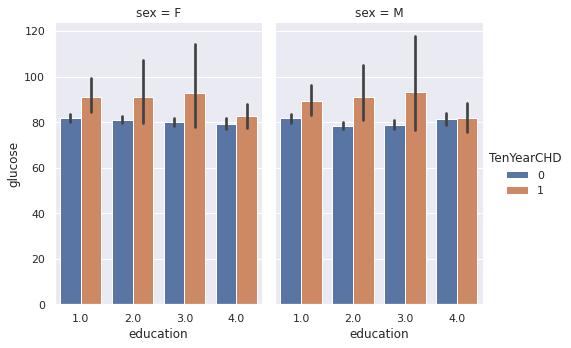

In [186]:
sns.catplot(x="education", y="glucose", hue="TenYearCHD",
            col="sex", aspect=.7,
            kind="bar", data=df)
#you can change kind to bar/swan/anything

From here we can conclue that,

(1) Women with the highest education level are maintaining normal level of glucose. And slightly at low risk of CVR when compared to men with the highest education.

(2) Women with the education 2 are having high level of glucose and men with education 3 are having highest level of glucose.

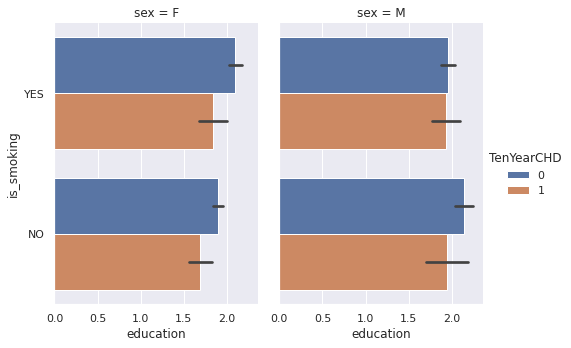

In [187]:
sns.catplot(x="education", y="is_smoking", hue="TenYearCHD",
            col="sex", aspect=.7,
            kind="bar", data=df)

We can clearly see that people with the basic level education are smoking alot. and they are at highest risk of CVR.

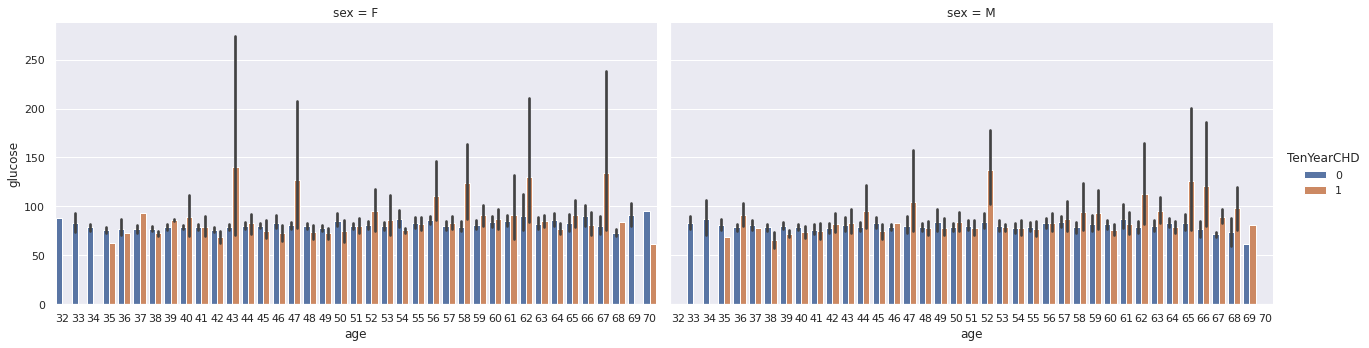

In [188]:
sns.catplot(x="age", y="glucose", hue="TenYearCHD",
            col="sex", aspect=1.8,
            kind="bar", data=df)

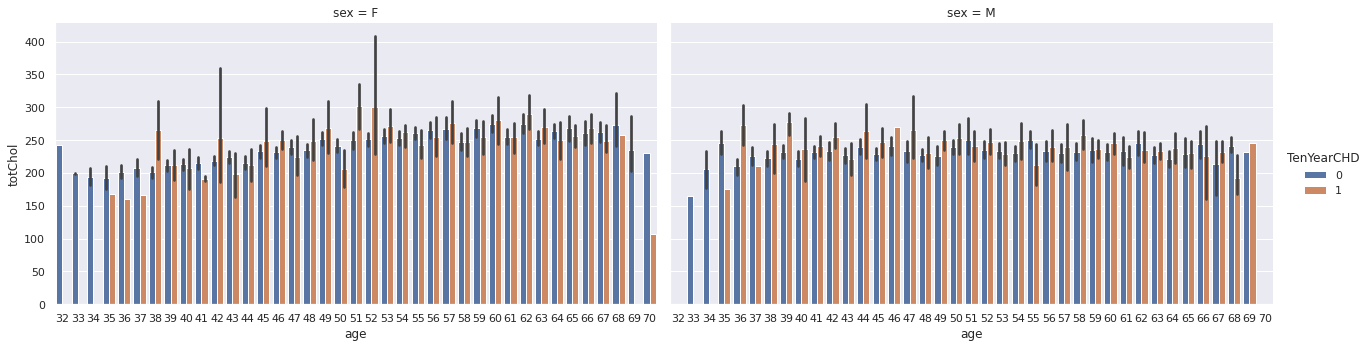

In [189]:
sns.catplot(x="age", y="totChol", hue="TenYearCHD",
            col="sex", aspect=1.8,
            kind="bar", data=df)

Here we can see that, People of age (40-70) whoever are having high level of glucose and cholestrol, all are at high rik of CVR.

# 5. Distribution plot of all numerical variables

Text(0.5, 0, 'Numerical variables')

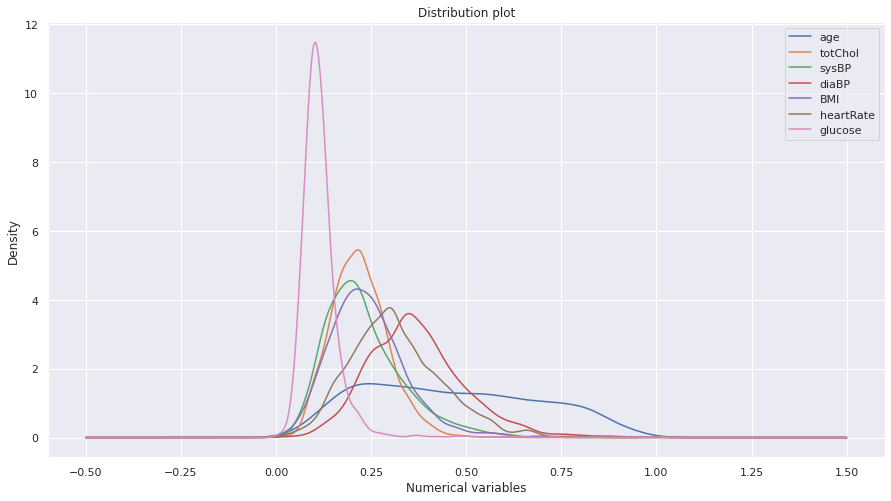

In [190]:
#Min max scaler
from sklearn.preprocessing import MinMaxScaler
column_names = numerical_columns
# column_names
#taking columns to do the minmaxscaling
cardio_2 = pd.DataFrame()
#using standardization as both numeric columns are in different scale
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[numerical_columns])
#print(scaled)
cardio_2 = pd.DataFrame(scaler.fit_transform(df[numerical_columns]))
cardio_2.columns = column_names

sns.set(rc = {'figure.figsize':(15,8)})
cardio_2.plot.kde()
plt.title("Distribution plot")
plt.xlabel("Numerical variables")

We can observe that there are many people with high level of glucose followed by cholestrol. It might be that the lifestyle of people are contributing more to these values. So we observe some peaks in these vlaues.

# **III. Treating Missing values**
We had already seen that there are 6 variables with missing values. Now we try treating all of the variables one by one. First lets start from categorical variables. We try to replace the missing values by mode of the categorical varibles.

## **( a ) Education null values**

In [191]:
#Education null values
df['education'].fillna(df['education'].mode().iloc[0],inplace=True)

In [192]:
df['education'].isna().sum()

0

### **( b ) BPMeds null values**


In [193]:
#BPMeds
df['BPMeds'].value_counts()

0.0    3246
1.0     100
Name: BPMeds, dtype: int64

In [194]:
#Treating null values
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode().iloc[0])

In [195]:
df['BPMeds'].isna().sum()

0

###**C) cigsPerday  null values**

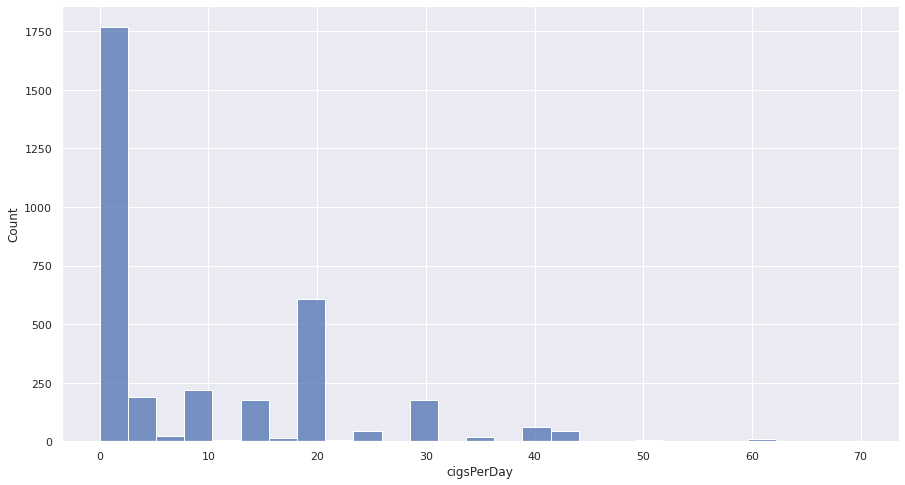

In [196]:
#cigsPer values
sns.histplot(df['cigsPerDay'])

In [197]:
df['cigsPerDay'].nunique()

32

In [198]:
#as we can see even though there are 32 different ans for cigsPer day..we have a positively skewed data
#so we can create nother category over here.

df['cigsPerDay'].astype("category")

cigsPerDay_data = df['cigsPerDay'].value_counts().reset_index()
cigsPerDay_data.rename(columns={'index':'Number_of_cigar','cigsPerDay':'Number_of_people'},inplace=True)
cigsPerDay_data.sort_values('Number_of_cigar',inplace=True)

In [199]:
df['cigsPerDay'].isna().sum()

22

In [200]:
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].mode().iloc[0])

Here, we handled the cigsPerDay variable like a categorical variable, its because there are very few unique values present in this column. We completely convert this column as categorical column later while doing the feature engineering.

Now that all the categorical variables missing values are treated with mode, we now try to handle the missing values of Numerical variables.

### **( d ) numeric variables null calues**

totChol  Null values are : 1.1209
BMI  Null values are : 0.413
heartRate  Null values are : 0.0295
glucose  Null values are : 8.9676


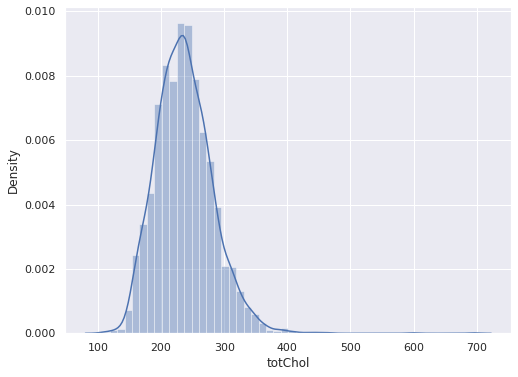

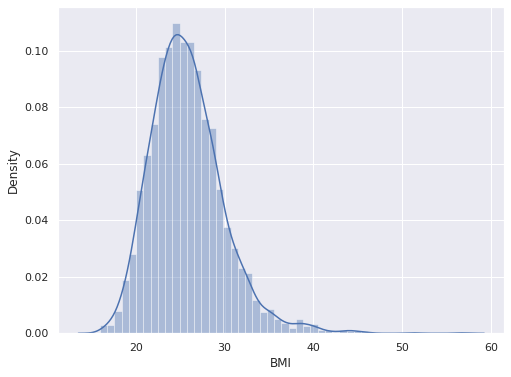

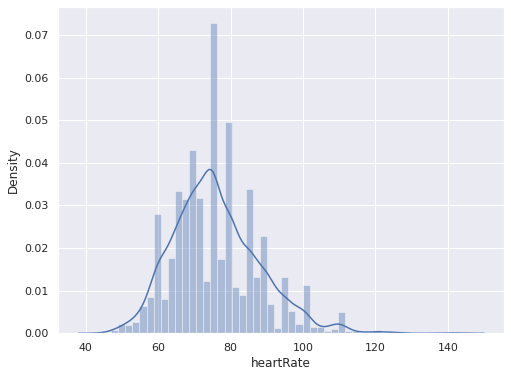

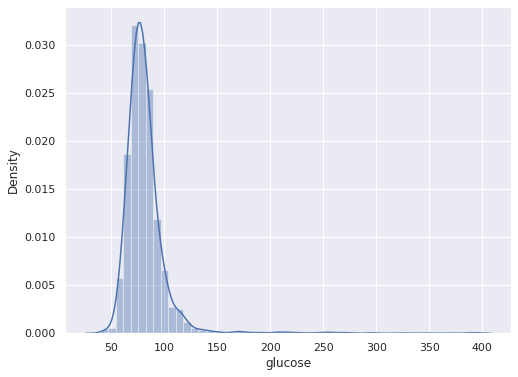

In [201]:
#Now we need to treat Missing values with only numeric variables
numeric_NA=[]
for i in numerical_columns:
  if df[i].isna().sum()>0:
    numeric_NA.append(i)
for i in numeric_NA:
  plt.figure(figsize=(8,6))
  print(i,' Null values are :',round(df[i].isna().sum()/len(df)*100,4))
  sns.distplot(df[i])

We saw the distribution of all the numerical variables whichever were having missing values. Now we will handle the missing values of the column with less than 5% with mean. And 'glucose' is the column with more than 5% of missing values are present, so we try finding the missing values by KNN imputation.

In [202]:
#Here we can observe that all the variables are normally distributed
# and the number of missing values are very less for totChol,BMI and heartRate (<2%)
#But for glucose MV % is ~9%
# so we equate MV of first 3 with mean
# and we use KNN imputer to find the MV of glucose
def fillna_numeric_with_mean(df,col):
  df[col] = df[col].fillna(df[col].mean())

In [203]:
for i in numeric_NA:
  if i!= 'glucose':
    fillna_numeric_with_mean(df,i)

In [204]:
#KNN to find the missing values for glucose

from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# Defining scaler and imputer objects
scaler = StandardScaler()
imputer = KNNImputer()

# Imputing missing values with KNN if any
df['glucose'] = imputer.fit_transform((df['glucose'].values.reshape(-1,1)))

In [205]:
#Afer data inputation we will cross check tthe null values
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

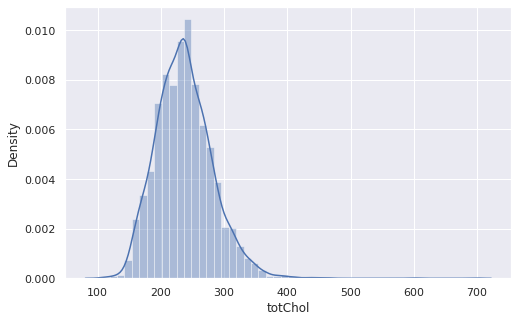

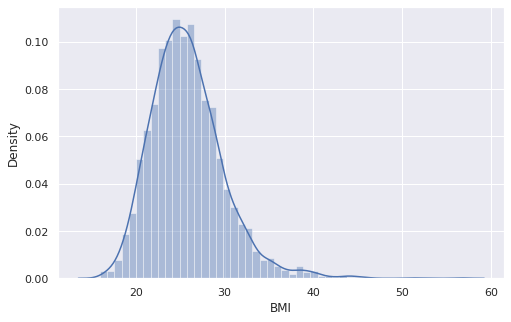

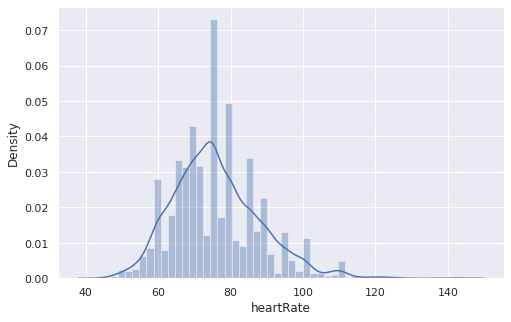

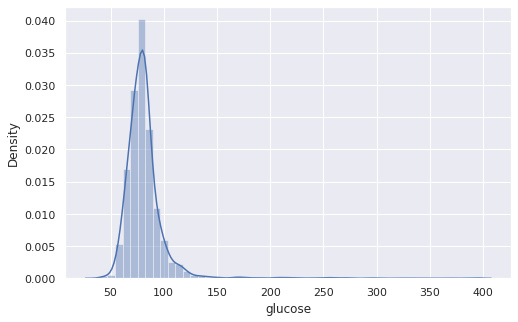

In [206]:
for i in numeric_NA:
  plt.figure(figsize=(8,5))
  sns.distplot(df[i])


###Now that missing values are treated, we will move on with the next step i.e., treating outliers.

In [207]:
#droping unwanted coloumn 
df.drop('id',axis=1,inplace=True)

# IV. Treating Outliers

In [208]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3390.0,49.542183,8.592878,32.00,42.00,49.0,56.0000,70.0
education,3390.0,1.946018,1.017568,1.00,1.00,2.0,3.0000,4.0
cigsPerDay,3390.0,9.010619,11.862839,0.00,0.00,0.0,20.0000,70.0
BPMeds,3390.0,0.029499,0.169224,0.00,0.00,0.0,0.0000,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.0,0.0000,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.0,1.0000,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.0,0.0000,1.0
totChol,3390.0,237.074284,44.993041,107.00,206.00,235.0,264.0000,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.5,144.0000,295.0
diaBP,3390.0,82.883038,12.023581,48.00,74.50,82.0,90.0000,142.5


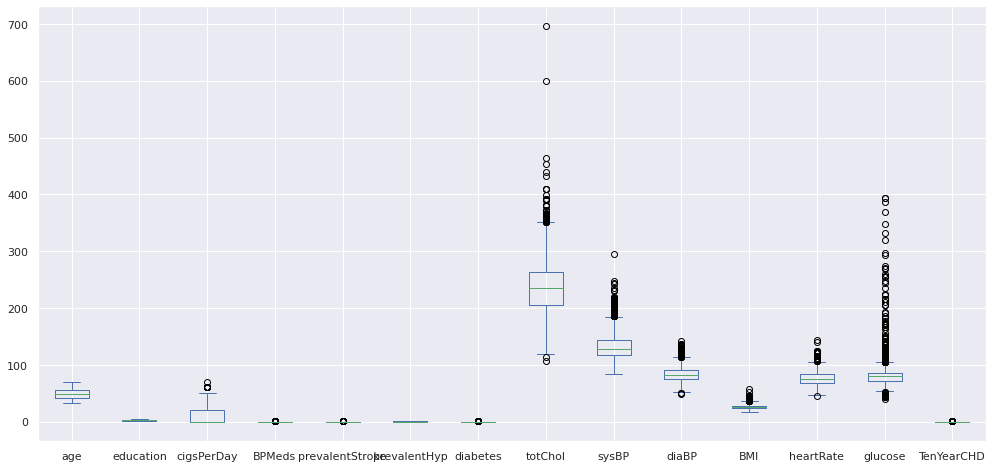

In [209]:
#Box Plot for analyzing the outliers
df.plot(kind='box',figsize=(17,8))

In [210]:
#Stored all the features where we want to remove outliers
outlier_col = ['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

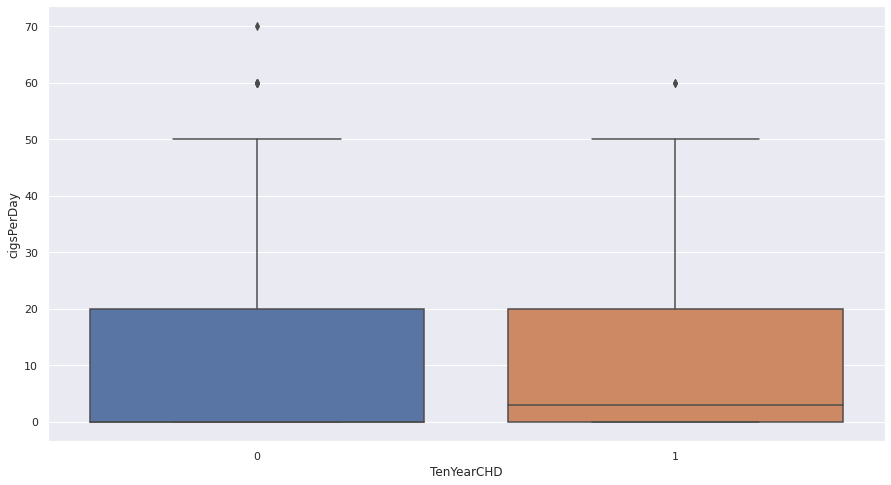

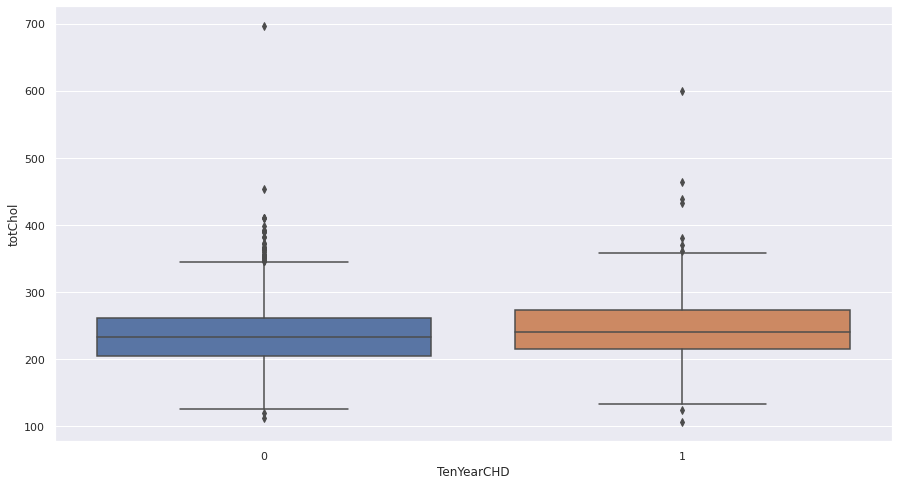

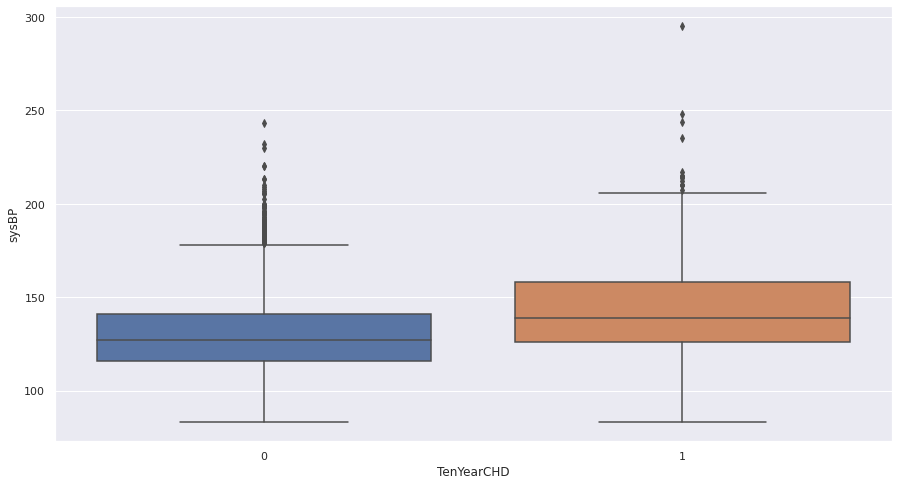

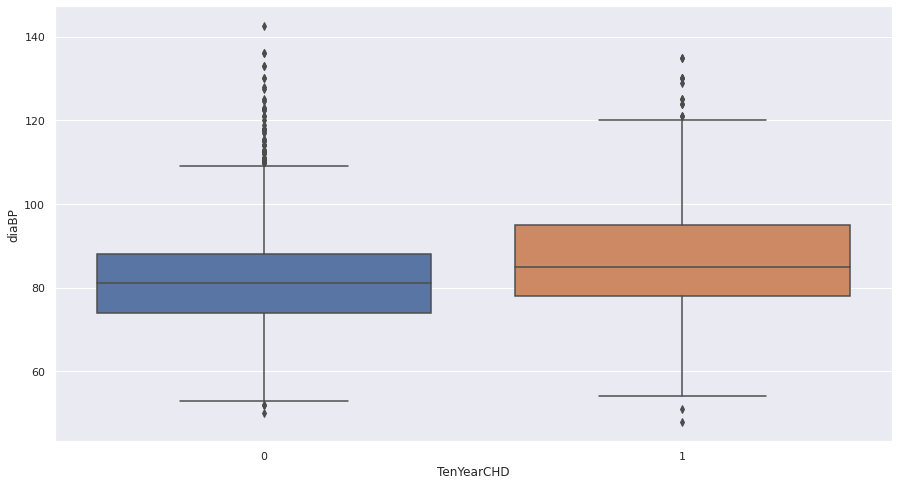

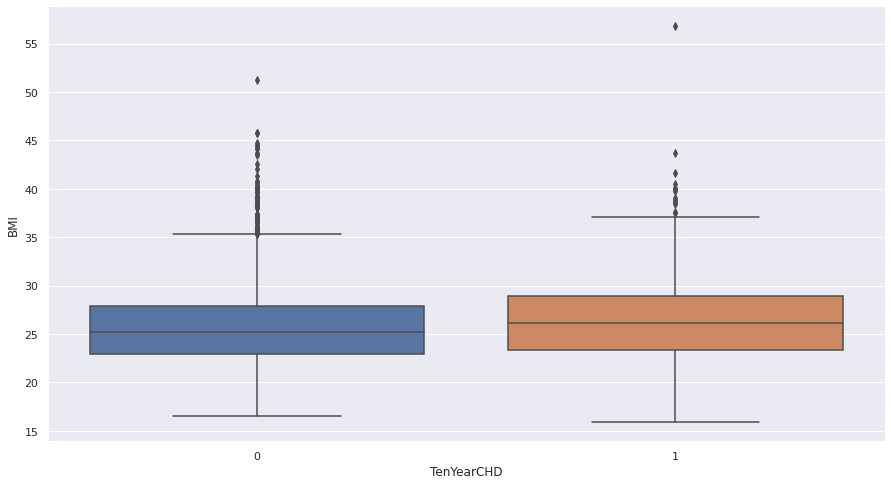

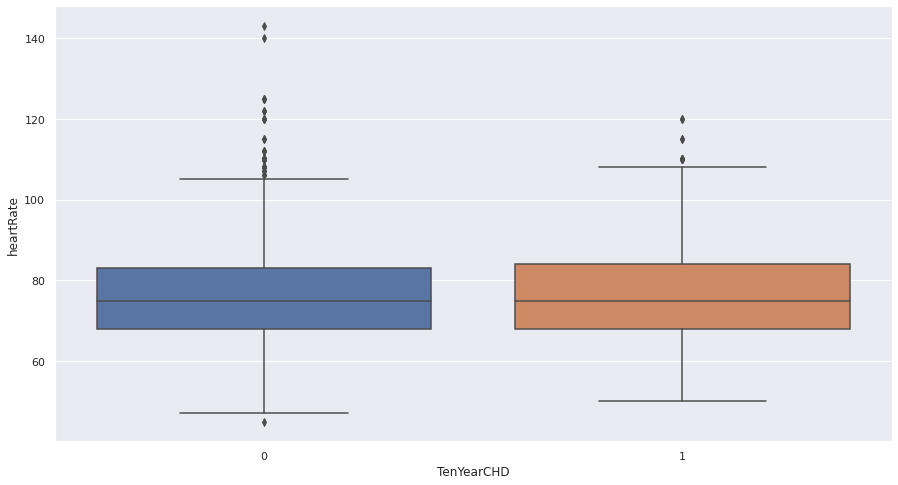

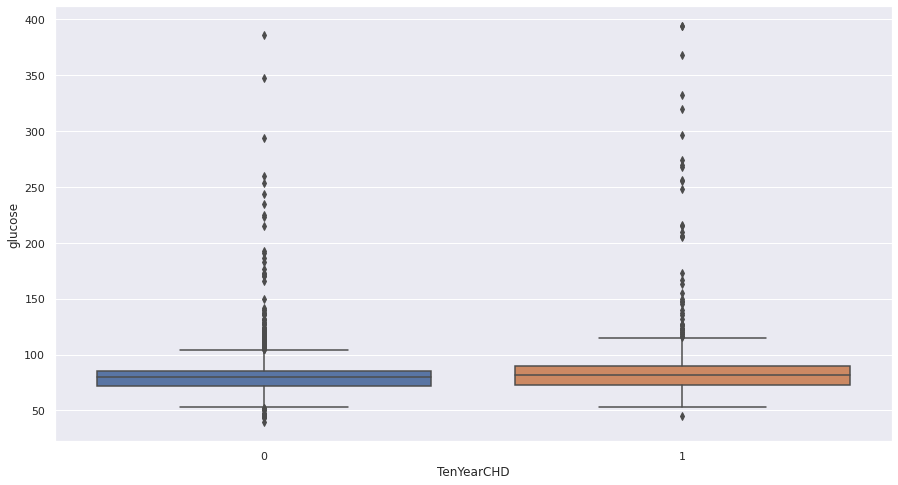

In [211]:
#Analyzing the outlier columns
for col in outlier_col:
  sns.boxplot(x=df['TenYearCHD'],y=df[col],data=df)
  plt.show()

By the above boxplot we will which features haveing outliers.

cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose. these features having outliers..

then we can store all outliers containg coloumns in one list to remove the outliers.

In [212]:
#Handling Outliers
df[outlier_col]=df[outlier_col].clip(lower=df[outlier_col].quantile(0.10),upper=df[outlier_col].quantile(0.90),axis=1)


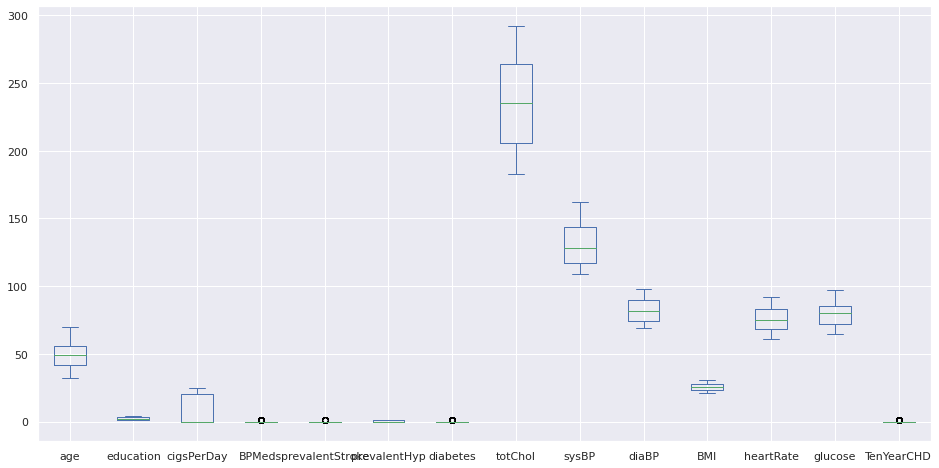

In [213]:
#Box plot after handling outliers
df.plot(kind='box',figsize=(16,8))

In [214]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3390.0,49.542183,8.592878,32.00,42.00,49.0,56.0000,70.000
education,3390.0,1.946018,1.017568,1.00,1.00,2.0,3.0000,4.000
cigsPerDay,3390.0,8.047788,9.705007,0.00,0.00,0.0,20.0000,25.000
BPMeds,3390.0,0.029499,0.169224,0.00,0.00,0.0,0.0000,1.000
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.0,0.0000,1.000
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.0,1.0000,1.000
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.0,0.0000,1.000
totChol,3390.0,235.495523,34.993706,183.00,206.00,235.0,264.0000,292.000
sysBP,3390.0,131.407080,17.191253,109.00,117.00,128.5,144.0000,162.500
diaBP,3390.0,82.438348,9.312992,69.00,74.50,82.0,90.0000,98.000


Now that EDA, treatment of missing values and treatment iof outliers are done, we start with the feature engineering.

# **V. Feature Engineering**

In [215]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,162.5,98.0,29.770000,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,21.030000,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,64,1.0,F,YES,25.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


In [216]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,162.5,98.0,29.770000,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,21.030000,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,64,1.0,F,YES,25.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


In [217]:
#there is no pre requisite for classification models but having variables with less covariation brings out the performance of the models
#so just checking about the correlation (Numerical columns only for now)

## **3. Checking Multicollinearity**

Multicollinearity is a statistical concept where several independent variables in a model are correlated.

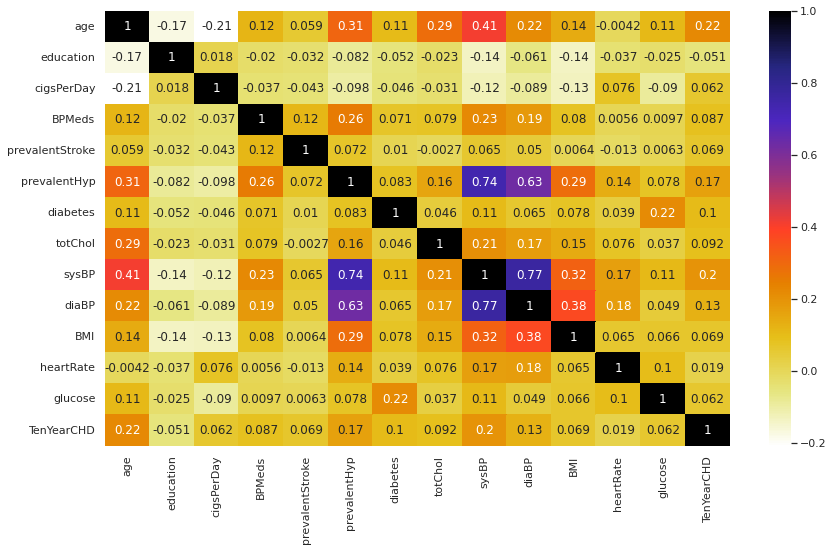

In [218]:
# Heatmap:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.CMRmap_r)

In [219]:
import numpy as np
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [220]:
corr_features = correlation(df, 0.60)
len(set(corr_features))

2

In [221]:
corr_features

{'diaBP', 'sysBP'}

In [222]:
df_copy = df.copy()

In [223]:
#As per the higher corelation of these two coloumns, we are droping those features and make a copy of data for further analysis..
df_copy = df.drop(corr_features,axis=1)


In [224]:
df_copy.head(2)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,25.794964,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,29.770000,72.0,75.0,0


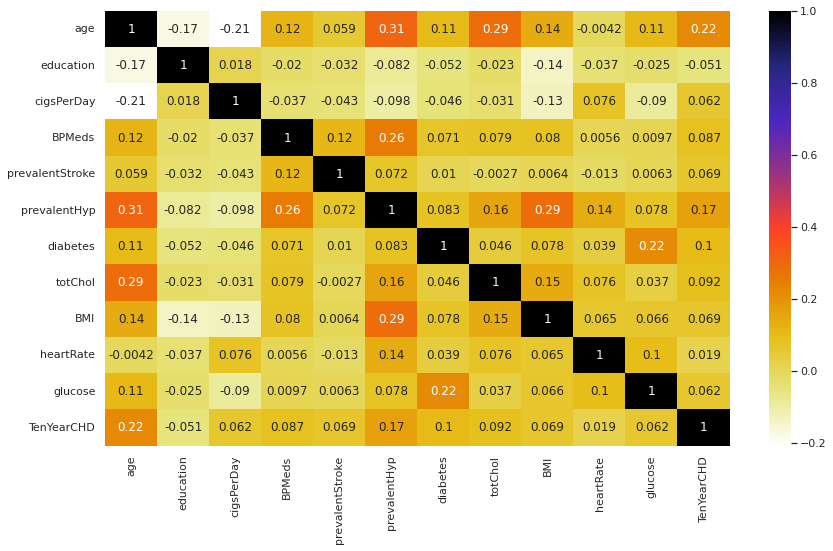

In [225]:
# Heatmap:
plt.figure(figsize=(14,8))
sns.heatmap(df_copy.corr(),annot=True,cmap=plt.cm.CMRmap_r)

Multicollinearity should be checked till we build models to make sure that we are not adding any variables with high correlation.

## **4. Feature selection**

In [226]:
#importing the libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [227]:
#Mapping the Variables
df_copy['is_smoking']=df_copy['is_smoking'].map({'YES':1,'NO':0})
df_copy['sex']=df_copy['sex'].map({'M':0,'F':1})

In [228]:
df_copy.head(2)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,1,1,3.0,0.0,0,0,0,221.0,25.794964,90.0,80.0,1
1,36,4.0,0,0,0.0,0.0,0,1,0,212.0,29.770000,72.0,75.0,0


In [229]:
df_copy1 = df_copy.drop('TenYearCHD',axis = 1)
X = df_copy1
y=df_copy['TenYearCHD'].values

In [230]:
#finding the f scores of each features
f_scores = f_regression(X, y)
f_scores

(array([180.54002751,   8.97046861,  24.45037479,   3.95407841,
         12.996975  ,  26.04892167,  16.03169387,  96.65404643,
         36.81579091,  29.20528852,  16.10567303,   1.20011706,
         13.20183914]),
 array([3.86915119e-40, 2.76364214e-03, 7.99532542e-07, 4.68382420e-02,
        3.16488965e-04, 3.51199408e-07, 6.36267226e-05, 1.64691240e-22,
        1.44156459e-09, 6.95995107e-08, 6.12002473e-05, 2.73376152e-01,
        2.83823732e-04]))

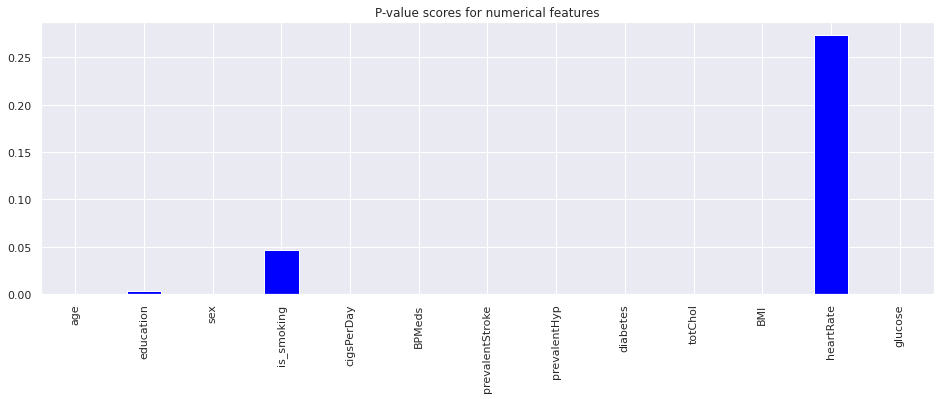

In [231]:
#The second array consists of p-values that we need. let's plot it
p_values= pd.Series(f_scores[1],index= X.columns)
p_values.plot(kind='bar',color='blue',figsize=(16,5))
plt.title('P-value scores for numerical features')
plt.show()

In [232]:
#taking the features whcih ever is having less f scores.
selected_features = ['age', 'education','sex','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','BMI','cigsPerDay','glucose']
len(selected_features)

11

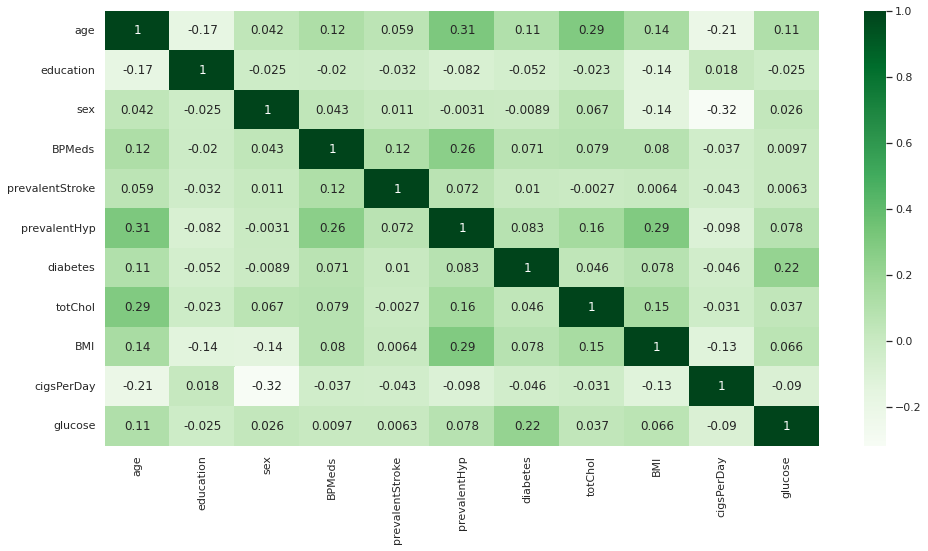

In [233]:
# Lets look at the correlation matrix now.
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
sns.heatmap(X[selected_features].corr(),annot=True, cmap='Greens')

# **V. Train Test Split**

In [234]:
X = X[selected_features]
y = df_copy['TenYearCHD'].copy()

In [235]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y,  test_size= 0.30, random_state= 5)

### **1. Treat Class imbalance by SMOTE or MSMOTE**
As we had many categorical variables in the dataset, there arises a problem of class imbalance. Its very important to treat the class imbalance before building a model. So we try treating the class imbalance. Here we have used the method of SMOTE.

In [236]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

# the numbers before SMOTE
num_before = dict(Counter(y_train))

#perform SMOTE

# define pipeline
#over = SMOTE(sampling_strategy=0.8)
#under = RandomUnderSampler(sampling_strategy=0.8)
#steps = [('o', over), ('u', under)]
#pipeline = Pipeline(steps=steps)

# transform the dataset
#X_smote, y_smote = pipeline.fit_resample(X_train, y_train)

from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X,y)
#Splitting the data
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size = 0.25, random_state=5)

#the numbers after SMOTE
num_after =dict(Counter(y_train_res))
print(num_before, num_after)

#using class_wieghts

class_weight = {0: 1,
                1: 6}

{0: 2028, 1: 345} {0: 2129, 1: 2089}


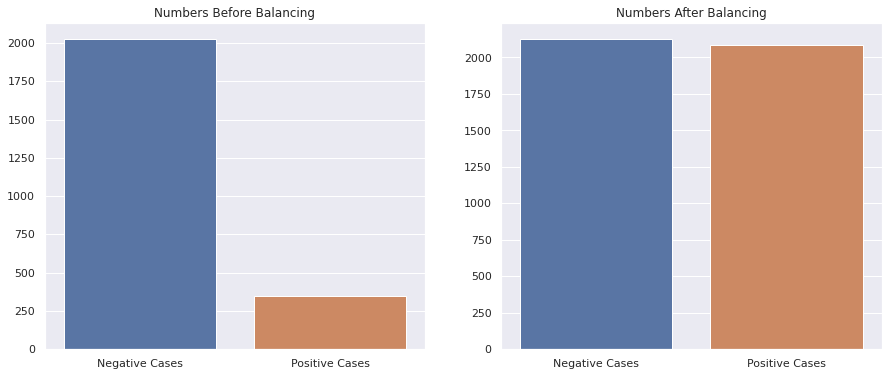

In [237]:
labels = ["Negative Cases","Positive Cases"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(labels, list(num_before.values()))
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(labels, list(num_after.values()))
plt.title("Numbers After Balancing")
plt.show()

## **VI. Build models**
Now we start building models for our classiffication problem. We have used some of the models like,

(1)Logistic regression

(2)Support Vector Machine (SVM)

(3)K nearest neighbour (KNN)

(4)Naive Bayes

(5)Decision Tree

(6)Adaboost

(7)Random Forest

### **1. Building all models**

In [238]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_curve, roc_auc_score

In [239]:
dtc = DecisionTreeClassifier()
ran = RandomForestClassifier(n_estimators=90)
knn = KNeighborsClassifier(n_neighbors=79)
svm = SVC(random_state=6)
lgr = LogisticRegression(solver='liblinear')
adb = AdaBoostClassifier(algorithm='SAMME.R',random_state=42)
nb = GaussianNB()

In [240]:
df_copy1.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose
0,64,2.0,1,1,3.0,0.0,0,0,0,221.0,25.794964,90.0,80.0
1,36,4.0,0,0,0.0,0.0,0,1,0,212.0,29.770000,72.0,75.0
2,46,1.0,1,1,10.0,0.0,0,0,0,250.0,21.030000,88.0,94.0
3,50,1.0,0,1,20.0,0.0,0,1,0,233.0,28.260000,68.0,94.0
4,64,1.0,1,1,25.0,0.0,0,0,0,241.0,26.420000,70.0,77.0


In [241]:

models = {"Decision tree" : dtc,
          "Random forest" : ran,
          "KNN" : knn,
          "SVM" : svm,
          "Logistic Regression" : lgr,
          "Adaboost" : adb,
          "Naive Bayes" : nb}
scores= { }

In [242]:
for key, value in models.items():    
    model = value
    model.fit(X_train_res, y_train_res)
    scores[key] = model.score(X_test_res, y_test_res)

In [243]:
# after feature election
scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_frame

,Accuracy Score
Random forest,0.892603
Decision tree,0.832148
Adaboost,0.832148
Logistic Regression,0.700569
Naive Bayes,0.684211
KNN,0.674253
SVM,0.649360


We can observe that the accuracy score is high in Adaboost. But by looking into just the accuracy we can not come to any conclusion. So we try the cross validation here.

## **2. Cross validation**

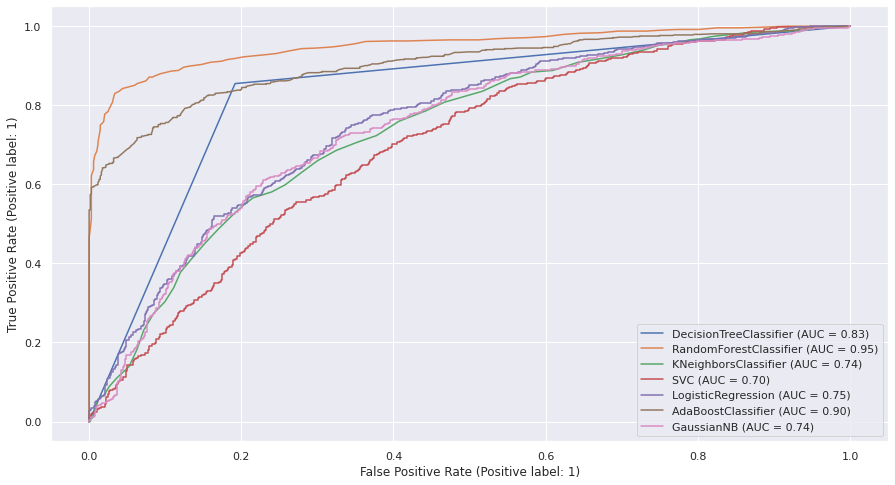

In [244]:
from sklearn.metrics import plot_roc_curve,classification_report

disp = plot_roc_curve(dtc, X_test_res, y_test_res)
plt.rcParams['figure.figsize'] = (16, 16)
plot_roc_curve(ran,X_test_res, y_test_res, ax = disp.ax_)
plot_roc_curve(knn,X_test_res, y_test_res, ax = disp.ax_)
plot_roc_curve(svm,X_test_res, y_test_res, ax = disp.ax_)
plot_roc_curve(lgr,X_test_res, y_test_res, ax = disp.ax_)
plot_roc_curve(adb,X_test_res, y_test_res, ax = disp.ax_)
plot_roc_curve(nb,X_test_res, y_test_res, ax = disp.ax_)

If we have a look at ROC curve then we can conclude that Naive Bayes and logistic regression are performing well. But again this alone is not sufficient. So we have a look at the evaluation metric and confusion metric of these models.

### **ii. Confusion Metric**

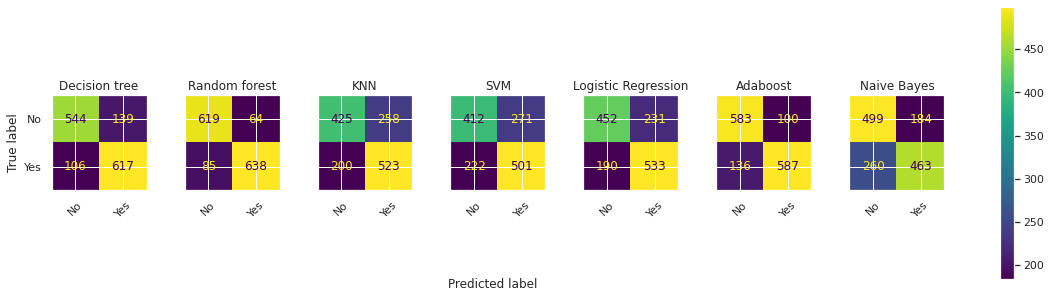

In [245]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


classifiers = {"Decision tree" : dtc,
          "Random forest" : ran,
          "KNN" : knn,
          "SVM" : svm,
          "Logistic Regression" : lgr,
          "Adaboost" : adb,
          "Naive Bayes" : nb}

f, axes = plt.subplots(1, 7, figsize=(20, 5), sharey='row')
# fig, (ax1,ax2, ax3) = plt.subplots(1,7,nrows=3, sharex=True)
for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.fit(X_train_res, y_train_res).predict(X_test_res)
    cf_matrix = confusion_matrix(y_test_res, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix,
                                  display_labels=['No','Yes'])
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')

plt.subplots_adjust(wspace=0.40, hspace=0.1)
#axes.grid(False)
f.colorbar(disp.im_, ax=axes)
#plt.grid(False)
#plt.rcParams['axes.grid'] = False
plt.show()

In [246]:
PN=[]
for key, value in models.items():
    model_data = {}
    model_data["Name"] = key
    value.fit(X_train_res, y_train_res)
    predicted = value.predict(X_test_res)
    conf_mat = confusion_matrix(y_test_res, predicted)
    model_data['True_positive'] = conf_mat[0][0]
    model_data['False_positive'] = conf_mat[0][1]
    model_data['False_negative'] = conf_mat[1][0]
    model_data['True_negative']= conf_mat[1][1]
    model_data['Correct_prediction'] = model_data['True_positive'] + model_data['True_negative']
    model_data['Wrong_prediction'] = model_data['False_positive'] + model_data['False_negative']
    PN.append(model_data)
PN=pd.DataFrame(PN)
PN

,Name,True_positive,False_positive,False_negative,True_negative,Correct_prediction,Wrong_prediction
0,Decision tree,546,137,102,621,1167,239
1,Random forest,627,56,93,630,1257,149
2,KNN,425,258,200,523,948,458
3,SVM,412,271,222,501,913,493
4,Logistic Regression,452,231,190,533,985,421
5,Adaboost,583,100,136,587,1170,236
6,Naive Bayes,499,184,260,463,962,444


We can see that that many wrong predictions were made in Naive Bayes	and least wrong predictions were made in Random forest.

### **iv. Evaluation Metric**

In [247]:
models = [['Adaboost', AdaBoostClassifier(random_state=42)],
          ['Decision tree', DecisionTreeClassifier()],
          ['KNN', KNeighborsClassifier(n_neighbors=79)],
          ['Logistic Regression', LogisticRegression(solver='liblinear')],
          ['Naive Bayes', GaussianNB()],
          ['Random forest', RandomForestClassifier(n_estimators=90)],
          ['SVM', SVC(random_state=6)]
          ]

In [248]:
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,recall_score,accuracy_score,precision_score
model_1_data = []
for name,model in models :
    model_data = {}
    model_data["Name"] = name
    model.fit(X_train_res, y_train_res)
    predicted = model.predict(X_test_res)
    conf_mat = confusion_matrix(y_test_res, predicted)
    true_positive = conf_mat[0][0]
    false_positive = conf_mat[0][1]
    false_negative = conf_mat[1][0]
    true_negative = conf_mat[1][1]
    train_y_predicted = model.predict(X_train_res)
    test_y_predicted = model.predict(X_test_res)
    model_data['Train_accuracy'] = accuracy_score(y_train_res,train_y_predicted)
    model_data['Test_accuracy'] = accuracy_score(y_test_res,test_y_predicted)
    #model_data["Accuracy"] = accuracy_score(y_test,predicted)
    model_data['Precision'] = true_positive/(true_positive+false_positive)
    model_data['Recall']= true_positive/(true_positive+false_negative)
    model_data['F1_Score'] = 2*(model_data['Recall'] * model_data['Precision']) / (model_data['Recall'] + model_data['Precision'])
    model_1_data.append(model_data)

In [249]:
model_1_data = pd.DataFrame(model_1_data)
# model_1_data = model_1_data.sort_values('train_accuracy',ascending=False)
model_1_data

,Name,Train_accuracy,Test_accuracy,Precision,Recall,F1_Score
0,Adaboost,0.830963,0.832148,0.853587,0.810848,0.831669
1,Decision tree,1.000000,0.823613,0.790630,0.837209,0.813253
2,KNN,0.671408,0.674253,0.622255,0.680000,0.649847
3,Logistic Regression,0.700569,0.700569,0.661786,0.704050,0.682264
4,Naive Bayes,0.685633,0.684211,0.730600,0.657444,0.692094
5,Random forest,1.000000,0.900427,0.916545,0.882934,0.899425
6,SVM,0.655524,0.649360,0.603221,0.649842,0.625664


Here we are getting a view of all scores of evaluation metric that is train and test accuracy, Precision, Recall and F1 score.

From here we can conclude that,

(1) Some modeles are facing overfitting problem.(i.e,Decision treeand random forest)

(2) if accuracy is above 70% then that model predict well/perform well.

(3) So lets just consider, accuracy and recall of these models for evaluation.

(4) First lets just consider recall, the more its near to 1, the more the performance of the model. We can see high recall in Adaboost, Decision Tree  and Random Forest models.

(5) If we now have a look of these 3 models train and test accuracy, then Random forest is overfitting.

(6) So from here, we can conclude that  Adaboost,Logistic regression and naive bayes are performing well.

# **3. Conclusion**

In [250]:
classifiers = [AdaBoostClassifier(random_state=42),DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors=79),LogisticRegression(solver='liblinear'),GaussianNB(),RandomForestClassifier(n_estimators=90),SVC(random_state=6)]
classifiers_names = ['Adaboost','Decision tree','KNN','Logistic Regression','Naive Bayes','Random Forest','SVM']
training,testing = [],[]
for i in classifiers:
    i.fit(X_train_res, y_train_res)
    train_y_predicted = i.predict(X_train_res)
    test_y_predicted = i.predict(X_test_res)
    tr = round(accuracy_score(y_train_res,train_y_predicted),4)
    ts = round(accuracy_score(y_test_res,test_y_predicted),4)
    training.append(tr)
    testing.append(ts)

In [251]:

diff = abs(np.array(training)-np.array(testing))

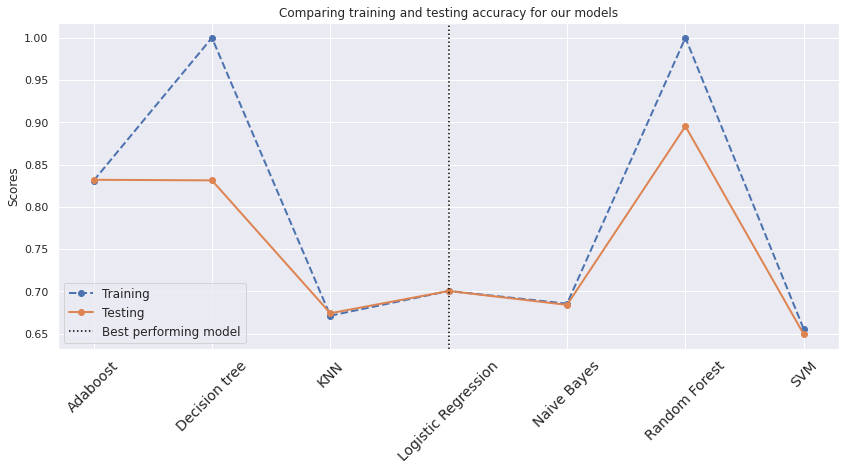

In [252]:
plt.figure(figsize=(14,6))
plt.plot(range(0,len(classifiers)),training,'--o',lw=2,label='Training')
plt.plot(range(0,len(classifiers)),testing,'-o',lw=2,label='Testing')
plt.xticks(range(0,len(classifiers)), classifiers_names, rotation=45,fontsize=14)
plt.axvline(np.argmin(diff),linestyle=':', color='black', label=f'Best performing model')
plt.ylabel("Scores")
plt.title("Comparing training and testing accuracy for our models")
plt.grid(True)
plt.legend(loc='best',fontsize=12);

We already had concluded that adaboost,Logistic Regression  are performing well. Lets just try all other models with hyperparamter tuning and we will try to observe the performance of these models.

# **VIII. Hyper-parameter tuning**
## **( a ) Hyperparameter Tuning for all models**
**1. Hyper parameter tuning - KNN**

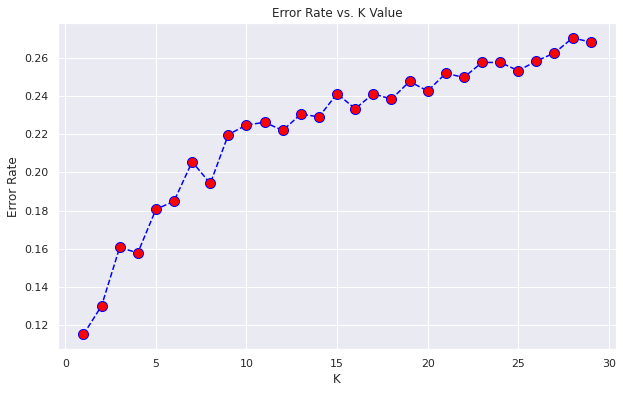

In [253]:
error_rate = []

for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_res,y_train_res)
    pred_i = knn.predict(X_test_res)
    error_rate.append(np.mean(pred_i != y_test_res))
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');


In [254]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res,y_train_res)
knn_pred = knn.predict(X_test_res)
print(classification_report(y_test_res,knn_pred))

              precision    recall  f1-score   support

           0       0.94      0.71      0.81       683
           1       0.78      0.96      0.86       723

    accuracy                           0.84      1406
   macro avg       0.86      0.84      0.84      1406
weighted avg       0.86      0.84      0.84      1406



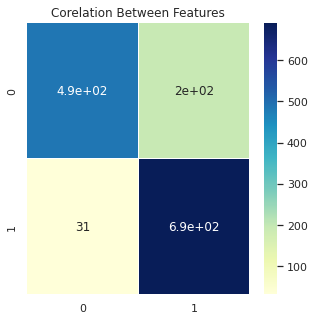

In [255]:
conf_mat = confusion_matrix(y_test_res, knn_pred)
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

### **2. Hyper parameter tuning - Random forest**

In [256]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {'max_depth': [80, 90],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 200]}
grid=GridSearchCV(RandomForestClassifier(),param_grid_rf,verbose=1)
grid.fit(X_train_res,y_train_res)
grid.best_params_

Fitting 5 folds for each of 32 candidates, totalling 160 fits


{'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [257]:
grid_pred = grid.predict(X_test_res)
print(classification_report(y_test_res,grid_pred,digits=4))

              precision    recall  f1-score   support

           0     0.8618    0.8946    0.8779       683
           1     0.8967    0.8645    0.8803       723

    accuracy                         0.8791      1406
   macro avg     0.8792    0.8795    0.8791      1406
weighted avg     0.8797    0.8791    0.8791      1406



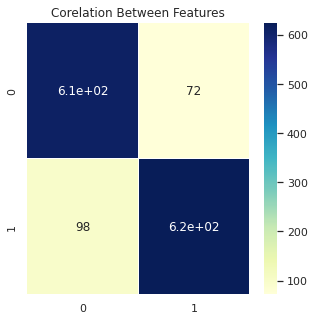

In [258]:
conf_mat = confusion_matrix(y_test_res, grid_pred)
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

## **3. Hyper parameter tuning - Logistic Regression**

In [259]:
# Necessary imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
  
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid_lgr = {'C': c_space}
  
# Instantiating logistic regression classifier
logreg = LogisticRegression()
  
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid_lgr, cv = 5)
  
logreg_cv.fit(X_train_res, y_train_res)
  
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 1389495.494373136}
Best score is 0.6920294254889725


In [260]:
logreg_pred = logreg_cv.predict(X_test_res)
print(classification_report(y_test_res,logreg_pred,digits=4))

              precision    recall  f1-score   support

           0     0.6741    0.6662    0.6701       683
           1     0.6881    0.6957    0.6919       723

    accuracy                         0.6814      1406
   macro avg     0.6811    0.6809    0.6810      1406
weighted avg     0.6813    0.6814    0.6813      1406



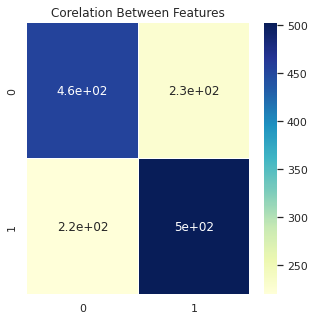

In [261]:
conf_mat = confusion_matrix(y_test_res, logreg_pred)
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

## **4. Hyper parameter tuning - Decision Tree**

In [262]:
# Necessary imports
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
  
# Creating the hyperparameter grid 
param_dist = {'max_depth': [80, 90],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
              "criterion": ["gini", "entropy"]}
  
# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier()
  
# Instantiating GridSearchCV object
tree_cv = GridSearchCV(tree, param_dist, cv = 5)
  
tree_cv.fit(X_train_res, y_train_res)
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 8}
Best score is 0.7835450012087276


In [263]:
tree_pred = tree_cv.predict(X_test_res)
print(classification_report(y_test_res,tree_pred,digits=4))

              precision    recall  f1-score   support

           0     0.7343    0.7892    0.7608       683
           1     0.7857    0.7303    0.7570       723

    accuracy                         0.7589      1406
   macro avg     0.7600    0.7597    0.7589      1406
weighted avg     0.7608    0.7589    0.7588      1406



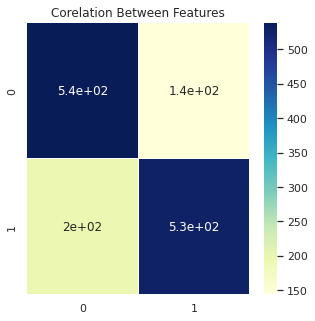

In [264]:
conf_mat = confusion_matrix(y_test_res, tree_pred)
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

## **5. Hyper paramter tuning - Adaboost**

In [265]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.grid_search import GridSearchCV

param_grid_adb = {
    'n_estimators': [20, 50, 70, 100],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
    'n_estimators' : [100, 200, 300, 400, 500]
             }


#DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "auto",max_depth = None)

adb = AdaBoostClassifier()

# run grid search
adaboost_cv = GridSearchCV(adb, param_grid=param_grid_adb, cv = 5)
adaboost_cv.fit(X_train_res, y_train_res)
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(adaboost_cv.best_params_))
print("Best score is {}".format(adaboost_cv.best_score_))

Tuned Decision Tree Parameters: {'learning_rate': 0.3, 'n_estimators': 500}
Best score is 0.8295379287469149


In [266]:
adb_pred = adaboost_cv.predict(X_test_res)
print(classification_report(y_test_res,adb_pred,digits=4))

              precision    recall  f1-score   support

           0     0.8029    0.9004    0.8489       683
           1     0.8938    0.7911    0.8393       723

    accuracy                         0.8442      1406
   macro avg     0.8483    0.8458    0.8441      1406
weighted avg     0.8496    0.8442    0.8440      1406



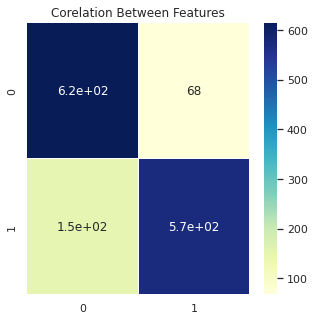

In [267]:
conf_mat = confusion_matrix(y_test_res, adb_pred)
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

## **6. Hyper parameter tuning - SVM**

In [268]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid_svm = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
svm = SVC()
svm_cv = GridSearchCV(svm, param_grid_svm, refit = True, verbose = 3)
 
# fitting the model for grid search
svm_cv.fit(X_train_res, y_train_res)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(svm_cv.best_params_))
print("Best score is {}".format(svm_cv.best_score_))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=   0.9s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=   0.9s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=   0.9s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=   0.9s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.504 total time=   0.9s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.514 total time=   0.9s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.508 total time=   0.9s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.508 total time=   0.9s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.509 total time=   0.9s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.507 total time=   0.9s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.711 total time=   0.9s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [269]:
svm_pred = svm_cv.predict(X_test_res)
print(classification_report(y_test_res,svm_pred,digits=4))

              precision    recall  f1-score   support

           0     0.9171    0.9400    0.9284       683
           1     0.9419    0.9198    0.9307       723

    accuracy                         0.9296      1406
   macro avg     0.9295    0.9299    0.9296      1406
weighted avg     0.9299    0.9296    0.9296      1406



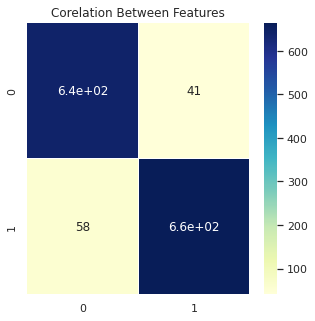

In [270]:
conf_mat = confusion_matrix(y_test_res, svm_pred)
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

## **7. Hyper parameter tuning - Naive Bayes**

In [271]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

In [272]:
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=nb, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_test_res)

gs_NB.fit(X_test_res, y_test_res);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [273]:
gs_NB.best_params_

{'var_smoothing': 2.848035868435799e-05}

In [274]:

gs_NB.best_score_

0.678050360499062

In [275]:
# predict the target on the test dataset
predict_test = gs_NB.predict(Data_transformed)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test_res,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.5384068278805121


In [276]:
print(classification_report(y_test_res,predict_test,digits=4))

              precision    recall  f1-score   support

           0     0.5130    0.9810    0.6737       683
           1     0.8700    0.1203    0.2114       723

    accuracy                         0.5384      1406
   macro avg     0.6915    0.5506    0.4426      1406
weighted avg     0.6966    0.5384    0.4360      1406



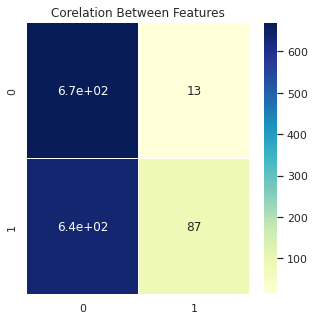

In [277]:
conf_mat = confusion_matrix(y_test_res, predict_test)
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

## **( b ) Cross validation after Hyperparameter Tuning**
As we are done with the hyper parameter tuning, we now do the cross validation of these models to get a better idea.

**i. ROC curve after Hyper Parameter Tuning**


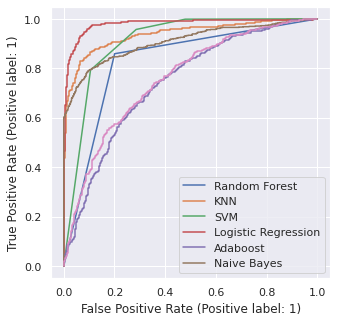

In [278]:
from sklearn.metrics import plot_roc_curve,classification_report

disp = plot_roc_curve(dtc, X_test_res, y_test_res)
plt.rcParams['figure.figsize'] = (10, 10)
plot_roc_curve(grid,X_test_res, y_test_res, ax = disp.ax_)
plot_roc_curve(knn,X_test_res, y_test_res, ax = disp.ax_)
plot_roc_curve(svm_cv,X_test_res, y_test_res, ax = disp.ax_)
plot_roc_curve(logreg_cv,X_test_res, y_test_res, ax = disp.ax_)
plot_roc_curve(adaboost_cv,X_test_res, y_test_res, ax = disp.ax_)
plot_roc_curve(gs_NB,X_test_res, y_test_res, ax = disp.ax_) 
plt.legend(['Random Forest','KNN','SVM','Logistic Regression','Adaboost','Naive Bayes'])

### **ii. Evaluation Metric after hyper parameter tuning**

In [279]:
# defining parameter range
param_grid= {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [280]:
models = [['Adaboost', AdaBoostClassifier(random_state=42)],
          ['Adaboost after Hyperparameter Tuning',GridSearchCV(adb, param_grid=param_grid_adb, cv = 5)],
          ['Decision Tree', DecisionTreeClassifier()],
          ['Decision Tree after Hyperparameter Tuning',GridSearchCV(tree, param_dist, cv = 5)],
          ['KNN', KNeighborsClassifier(n_neighbors=79)],
          ['KNN after Hyperparameter tuning ', KNeighborsClassifier(n_neighbors=5)],
          ['Logistic Regression', LogisticRegression(solver='liblinear')],
          ['Logistic Regression after Hyperparameter Tuning',GridSearchCV(logreg, param_grid_lgr, cv = 5)],
          ['Naive Bayes', GaussianNB()],
          ['Naive Bayes after Hyperparameter tuning',
           GridSearchCV(estimator=nb,
                        param_grid=params_NB,
                        cv=cv_method,
                        verbose=1, 
                        scoring='accuracy')],
          ['Random Forest', RandomForestClassifier(n_estimators=90)],
          ['Random Forest after Hyperparameter Tuning',GridSearchCV(RandomForestClassifier(),param_grid_rf,verbose=1)],
          ['SVM', SVC(random_state=6)],
          ['SVM after Hyperparameter Tuning',GridSearchCV(svm, param_grid, refit = True, verbose = 3)]
          ]

In [281]:
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,recall_score,accuracy_score,precision_score
model_1_data = []
for name,model in models :
    model_data = {}
    model_data["Name"] = name
    model.fit(X_train_res, y_train_res)
    predicted = model.predict(X_test_res)
    conf_mat = confusion_matrix(y_test_res, predicted)
    true_positive = conf_mat[0][0]
    false_positive = conf_mat[0][1]
    false_negative = conf_mat[1][0]
    true_negative = conf_mat[1][1]
    train_y_predicted = model.predict(X_train_res)
    test_y_predicted = model.predict(X_test_res)
    model_data['Train_accuracy'] = accuracy_score(y_train_res,train_y_predicted)
    model_data['Test_accuracy'] = accuracy_score(y_test_res,test_y_predicted)
    #model_data["Accuracy"] = accuracy_score(y_test,predicted)
    model_data['Precision'] = true_positive/(true_positive+false_positive)
    model_data['Recall']= true_positive/(true_positive+false_negative)
    model_data['F1_Score'] = 2*(model_data['Recall'] * model_data['Precision']) / (model_data['Recall'] + model_data['Precision'])
    model_1_data.append(model_data)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=   0.9s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=   0.9s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=   0.9s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=   0.9s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.504 total time=   0.8s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.514 total time=   0.9s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.508 total time=   0.9s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.508 total time=   0.9s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.509 total time=   0.9s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.507 total time=   0.9s
[

In [282]:
model_2_data = pd.DataFrame(model_1_data)
# model_1_data = model_1_data.sort_values('train_accuracy',ascending=False)
model_2_data

,Name,Train_accuracy,Test_accuracy,Precision,Recall,F1_Score
0,Adaboost,0.830963,0.832148,0.853587,0.810848,0.831669
1,Adaboost after Hyperparameter Tuning,0.839260,0.844239,0.900439,0.802872,0.848861
2,Decision Tree,1.000000,0.828592,0.799414,0.840000,0.819205
3,Decision Tree after Hyperparameter Tuning,0.901612,0.808677,0.837482,0.783562,0.809625
4,KNN,0.671408,0.674253,0.622255,0.680000,0.649847
5,KNN after Hyperparameter tuning,0.857041,0.819346,0.692533,0.914894,0.788333
6,Logistic Regression,0.700569,0.700569,0.661786,0.704050,0.682264
7,Logistic Regression after Hyperparameter Tuning,0.690612,0.681366,0.666179,0.674074,0.670103
8,Naive Bayes,0.685633,0.684211,0.730600,0.657444,0.692094
9,Naive Bayes after Hyperparameter tuning,0.686344,0.684922,0.732064,0.657895,0.693001


### **( c ) Conclusion after HyperParameter Tuning**

In [283]:
classifiers = [GridSearchCV(adb, param_grid=param_grid_adb, cv = 5),GridSearchCV(tree, param_dist, cv = 5),
               KNeighborsClassifier(n_neighbors=5),GridSearchCV(logreg, param_grid_lgr, cv = 5),
               GridSearchCV(estimator=nb,
                        param_grid=params_NB,
                        cv=cv_method,
                        verbose=1, 
                        scoring='accuracy'),
               GridSearchCV(RandomForestClassifier(),param_grid_rf,verbose=1),GridSearchCV(svm, param_grid, refit = True, verbose = 3)]
classifiers_names = ['Adaboost','Decision tree','KNN','Logistic Regression','Naive Bayes','Random Forest','SVM']
training,testing = [],[]
for i in classifiers:
    i.fit(X_train_res, y_train_res)
    train_y_predicted = i.predict(X_train_res)
    test_y_predicted = i.predict(X_test_res)
    tr = round(accuracy_score(y_train_res,train_y_predicted),4)
    ts = round(accuracy_score(y_test_res,test_y_predicted),4)
    training.append(tr)
    testing.append(ts)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=   0.9s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=   0.9s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=   0.9s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=   0.9s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.504 total time=   0.9s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.514 total time=   0.9s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.508 total time=   0.9s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.508 total time=   0.9s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.509 total time=   0.9s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.507 total time=   0.9s
[

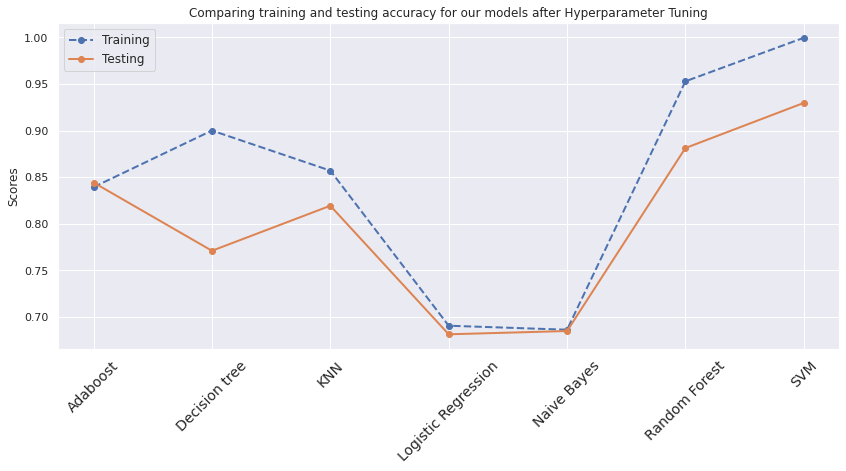

In [285]:
diff = abs(np.array(training)-np.array(testing))

plt.figure(figsize=(14,6))
plt.plot(range(0,len(classifiers)),training,'--o',lw=2,label='Training')
plt.plot(range(0,len(classifiers)),testing,'-o',lw=2,label='Testing')
plt.xticks(range(0,len(classifiers)), classifiers_names, rotation=45,fontsize=14)
#plt.axvline(np.argmin(diff),linestyle=':', color='black', label=f'Best performing model')
plt.ylabel("Scores")
plt.title("Comparing training and testing accuracy for our models after Hyperparameter Tuning")
plt.grid(True)
plt.legend(loc='best',fontsize=12);

**Conclusions:**

*The following columns lie in the range:

totChol: 150 to 300 , sysBP: 100 to 150, diaBP: 60 to 100 ,BMI: 20 to 30, heartRate: 50 to 100 glucose: 50 to 150 *Mid-age groups ranging from the age of 38 - 46 have more number of currentSmokers

* No currentSmokers observed below the age of 32
* Maximum age for a currentSmokers is 70
* Males have shown a slightly higher risk of coronary heart disease TenYearCHD.
* Mid-age groups ranging from the age of 38 - 46 have more number of currentSmokers
* No currentSmokers observed below the age of 32
* Low cigsPerDay comes with lower risk of CHD.
* Those who don't smoke, i.e., with a cigsPerDay of 0.0 has a really low risk of contracting the disease
* Minor relation of higher risk of TenYearCHD found with higher sysBP AND higher diaBP
* Majority of people with sysBP ranging from 72 - 130 has lower chance of contracting the disease.
* Majority of people with diaBP ranging upto 80.0 has lower chance of contracting the disease.
Again, age, total cholesterol level, diastolic blood pressure, BMI, and glucose level are the main culprits leading to heart diseases,especially CHD.

The above graph tells about a hyper parameter tuning. Even though the accuracy of some models were increased after hyper parameter tuning, still adaboost,Logistic regression and naive bayes are the best performing models.

Between those if we compare Naive bayes and Adaboost with the accuracy and recall, Adaboost is the best performance model.

After Hyperparameter tuning also, we saw some modeal are  facing overfitting. (i.e, SVM,RandomForest and Decision Tree)